- Sina Beyrami 400105433
- Aren golAzizian 99171366
- M.Hossein HajiHosseini 99101427 

#import libraries

In [1]:
%pip install -q transformers[torch]
%pip install -q python-bidi
%pip install -q hazm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import re
from hazm import Normalizer, word_tokenize, stopwords_list
import os
from wordcloud import WordCloud, STOPWORDS
from bidi import algorithm as bidi
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import string
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import torch
from tqdm import tqdm
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup

C:\Users\arenf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arenf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arenf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


# Exploratory Data Analysis (EDA) on Movie Dataset

The Exploratory Data Analysis (EDA) process is a crucial step to understand the characteristics and patterns present in a dataset. In this notebook, we'll perform EDA on a movie dataset to gain insights into various aspects such as genre distribution, release years, runtime, and ratings for both Persian and English language movies.

During the EDA process, we'll explore the dataset by:

1. Analyzing the genre distribution for Persian and English movies to identify popular genres.
2. Examining the release year trends for Persian and English movies to understand the distribution over time.
3. Investigating the runtime statistics for Persian and English movies to study the typical movie lengths.
4. Evaluating the rating distributions for Persian and English movies to gauge audience preferences.
...

The EDA process is iterative, and additional analyses may be required based on the insights gained from the initial exploration. The goal is to develop a comprehensive understanding of the dataset for both Persian and English language movies before proceeding with further analysis or modeling.

Feel free to explore the dataset creatively and provide any additional insights or visualizations that you find interesting or valuable. We encourage you to bring your unique perspective and creativity to enhance the EDA process.

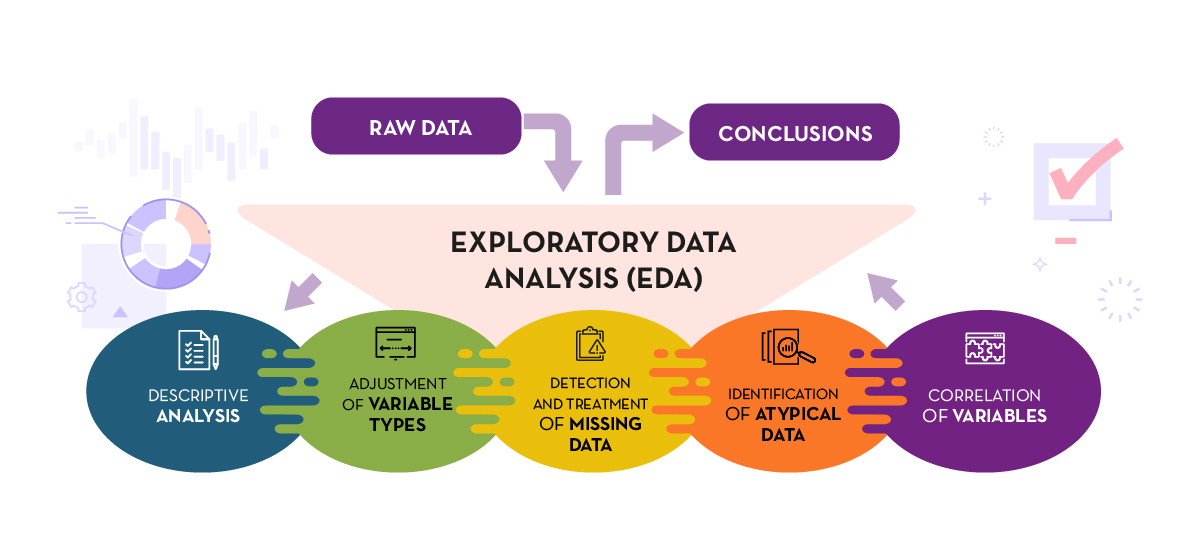

###1. **Data Preprocessing**:
   - Load the dataset
   - Check for missing values and handle them appropriately
   - Convert data types if necessary (e.g., string to datetime for release dates)
   - Create a new column called "preprocessed summary" where you perform the following steps and save the preprocessed summary in that column and later use it for the finetuning and analysis:
  *   Tokenize words
  *   Normalize text
  *   Remove punctuations
  *   Remove stopwords
  *   Removing HTML tags or markup
  *   Lemmatizing or stemming words
  *   Removing numbers or special characters
  *   Removing or replacing non-ASCII characters



In [4]:
# TODO: Load Dataset
df = pd.read_csv(r"C:\Users\arenf\Desktop\NLP\persianmovies.csv")
df.rename(columns={
    'Content_1': 'Persian summary',
    'Content_2': 'English summary'
}, inplace=True)

Handling for missing values

In [5]:
print(df.isnull().sum())

Link                 0
EN_title             0
PENGLISH_title       5
PERSIAN_title        1
Persian summary    361
English summary    206
Score                0
Year                 0
Genre                0
Time                 8
dtype: int64


In [6]:
df.dropna(inplace=True)

Converting data types if necessary

In [7]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Time'] = pd.to_numeric(df['Time'], errors='coerce')
print(df.dtypes)

Link                object
EN_title            object
PENGLISH_title      object
PERSIAN_title       object
Persian summary     object
English summary     object
Score              float64
Year                 int64
Genre               object
Time               float64
dtype: object


In [8]:
class Englsih_Preprocessor:
    """
    A class for preprocessing text data.

    Attributes:
        stopwords (set): A set of stopwords to be removed from the text.
        nlp (spacy.lang.en.English): A SpaCy English language model for text normalization.

    Methods:
        preprocess(text): Performs preprocessing steps on the given text.
        normalize(text): Normalizes the given text by converting it to lowercase and lemmatizing the words.
        remove_punctuations(text): Removes punctuation from the given text.
        word_tokenize(text): Tokenizes the given text into individual words.
        remove_stopwords(words): Removes stopwords from the given list of words.
        **ADD MORE METHODS**
    """

    def __init__(self):
        """
        Initializes the Preprocessor object.

        TODO: Load the set of stopwords for the English language.
        TODO: Load the SpaCy English language model for text normalization.
        """
        self.stopwords = set(stopwords.words('english'))
        self.nlp = spacy.load('en_core_web_sm')


    def preprocess(self, text):
        """
        Preprocesses the given text by performing normalization, punctuation removal, word tokenization, and stopword removal.

        Args:
            text (str): The input text to be preprocessed.

        Returns:
            str: The preprocessed text.

        TODO: Implement the preprocess method by calling the respective helper methods in the correct order.
        """
        text = self.normalize(text)
        text = self.remove_html_tags(text)
        text = self.remove_punctuations(text)
        text = self.remove_numbers_special_characters(text)
        text = self.remove_non_ascii(text)
        words = self.word_tokenize(text)
        words = self.remove_stopwords(words)
        return ' '.join(words)


    def normalize(self, text):
        """
        Normalizes the given text by converting it to lowercase and lemmatizing the words.

        Args:
            text (str): The input text to be normalized.

        Returns:
            str: The normalized text.

        TODO: Implement the normalize method using the SpaCy language model to lemmatize the words.
        """
        doc = self.nlp(text.lower())
        return ' '.join([token.lemma_ for token in doc])

    def remove_punctuations(self, text):
        """
        Removes punctuation from the given text.

        Args:
            text (str): The input text from which punctuation needs to be removed.

        Returns:
            str: The text with punctuation removed.

        TODO: Implement the remove_punctuations method using regular expressions.
        """
        return re.sub(r'[^\w\s]', '', text)

    def word_tokenize(self, text):
        """
        Tokenizes the given text into individual words.

        Args:
            text (str): The input text to be tokenized.

        Returns:
            list: A list of tokens (words) in the text.

        TODO: Implement the word_tokenize method using the NLTK word_tokenize function.
        """
        return word_tokenize(text)

    def remove_stopwords(self, words):
        """
        Removes stopwords from the given list of words.

        Args:
            words (list): A list of words from which stopwords need to be removed.

        Returns:
            list: A list of words with stopwords removed.

        TODO: Implement the remove_stopwords method by filtering out words present in the stopwords set.
        """
        return [word for word in words if word not in self.stopwords]
    
    def remove_numbers_special_characters(self, text):
        """
        Removes numbers and special characters from the given text.

        Args:
            text (str): The input text from which numbers and special characters need to be removed.

        Returns:
            str: The text with numbers and special characters removed.
        """
        return re.sub(r'[^a-zA-Z\s]', '', text)

    def remove_non_ascii(self, text):
        """
        Removes or replaces non-ASCII characters from the given text.

        Args:
            text (str): The input text from which non-ASCII characters need to be removed.

        Returns:
            str: The text with non-ASCII characters removed.
        """
        return text.encode('ascii', 'ignore').decode('ascii')

    def remove_html_tags(self, text):
        """
        Removes HTML tags or markup from the given text.

        Args:
            text (str): The input text from which HTML tags need to be removed.

        Returns:
            str: The text with HTML tags removed.
        """
        return BeautifulSoup(text, "html.parser").get_text()


In [9]:
# TODO: Apply the preprocess method of the Preprocessor object to the English Summary column of the DataFrame
# and store the preprocessed text in a new column named 'Preprocessed English'.
preprocessor = Englsih_Preprocessor()
df['Preprocessed English'] = df['English summary'].apply(preprocessor.preprocess)

# TODO: Display the updated DataFrame with the new 'Preprocessed English' column.
df.head()

,Link,EN_title,PENGLISH_title,PERSIAN_title,Persian summary,English summary,Score,Year,Genre,Time,Preprocessed English
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73.0,jalal dropout philosophy student realize siste...
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78.0,murder rich twin brother barbod assume identit...
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77.0,man woman car accident go coma spouse know two...
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79.0,gilda restaurant terrible night till morning s...
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85.0,vahid marjan young couple get divorce month ag...


In [10]:
from hazm import Normalizer, word_tokenize, stopwords_list, Stemmer

# TODO: Initialize the HAZM Normalizer
normalizer = Normalizer()
stemmer = Stemmer()
# TODO: Load the Persian stopwords list
stopwords = set(stopwords_list())
# TODO: Load desired functions from HAZM (or any other library)
def remove_diacritics(text):
    """
    Removes diacritics (tashkeel) from the given text.

    Args:
        text (str): The input text.

    Returns:
        str: The text without diacritics.
    """
    return re.sub(r'[\u064B-\u065F]', '', text)

def normalize_persian_characters(text):
    """
    Normalizes Persian characters that have multiple forms.

    Args:
        text (str): The input text.

    Returns:
        str: The text with normalized Persian characters.
    """
    text = re.sub(r'[ي]', 'ی', text)
    text = re.sub(r'[ك]', 'ک', text)
    text = re.sub(r'[ۀ]', 'ه', text)
    text = re.sub(r'[ؤ]', 'و', text)
    text = re.sub(r'[أإ]', 'ا', text)
    text = re.sub(r'[ة]', 'ه', text)
    text = re.sub(r'[ئ]', 'ی', text)
    return text

def persian_preprocess_text(text):
    """
    Preprocesses the given Persian text by performing normalization, punctuation removal, word tokenization, and stopword removal.

    Args:
        text (str): The input Persian text to be preprocessed.

    Returns:
        str: The preprocessed Persian text.

    TODO: Implement the following steps:
    1. Remove punctuations from the text using regular expressions.
    2. Normalize the text using the HAZM Normalizer.
    3. Tokenize the normalized text using the HAZM word_tokenize function.
    4. Remove stopwords from the tokenized text using the loaded stopwords list.
    5. Join the remaining tokens back into a string.
    6. ... (what other preprocessing methods you want to have)
    """
    text = BeautifulSoup(text, "html.parser").get_text()
    text = normalize_persian_characters(text)
    text = remove_diacritics(text)
    text = re.sub(r'[^\w\s]', '', text)
    text = normalizer.normalize(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords]
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# TODO: Apply the persian_preprocess_text function to the Persian Summary column of the DataFrame
# and store the preprocessed text in a new column named 'Preprocessed Persian'.
df['Preprocessed Persian'] = df['Persian summary'].apply(persian_preprocess_text)
# TODO: Display the updated DataFrame with the new 'Preprocessed Persian' column.
df.head()

C:\Users\arenf\AppData\Local\Temp\ipykernel_26748\1873447125.py:58: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,Link,EN_title,PENGLISH_title,PERSIAN_title,Persian summary,English summary,Score,Year,Genre,Time,Preprocessed English,Preprocessed Persian
0,https://www.imvbox.com/watch-persian-movie-ira...,Local Anaesthetic,Bi Hessie Mozeie,بی‌حسی موضعی,جلال‌، دانشجوی سابق رشته فلسفه، متوجه می‌شود خ...,"Jalal, a dropouts philosophy student, realizes...",4.8,2018,Drama,73.0,jalal dropout philosophy student realize siste...,جلال دانشجو سابق رشته فلسفه متوجه خواهر اختلال...
1,https://www.imvbox.com/watch-persian-movie-ira...,Disturbance,Ashoftegi,آشفته گی,«آشفته‌گی» رئالیستی و اجتماعی نیست. یک فیلم اس...,"After the murder of his rich twin brother, Bar...",3.8,2018,Crime,78.0,murder rich twin brother barbod assume identit...,آشفتهگ ریالیست اجتماع فیل عشق جنا
2,https://www.imvbox.com/watch-persian-movie-ira...,Highlight,Haylayt,هایلایت,یک تصادف اتومبیل آدم‌هایی را در تقابل با هم قر...,A man and a woman are have a car accident and ...,4.4,2017,Drama,77.0,man woman car accident go coma spouse know two...,تصادف اتومبیل آدم تقابل قرار مراقب مصدومین انت...
3,https://www.imvbox.com/watch-persian-movie-ira...,Gilda,Geelda,گیلدا,گیلدا ماجرای زنی به نام «گیلدا» را روایت می کن...,Gilda who owns a restaurant has a terrible nig...,3.8,2018,Drama,79.0,gilda restaurant terrible night till morning s...,گیلدا ماجرا زن نا گیلدا روا صاحب رستوانیس شب ا...
4,https://www.imvbox.com/watch-persian-movie-ira...,Atmosphere Station,Istgahe Atmosfer,ایستگاه اتمسفر,این فیلم روایت گر داستان زندگی زوج جوانی به اس...,Vahid and Marjan are a young couple who have g...,5.6,2017,Drama,85.0,vahid marjan young couple get divorce month ag...,فیل روایت‌گر داس زندگ زوج جوان اس مرج وحید ه م...


### 2. **Descriptive Statistics**:
   - Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables
   - Determine the count and frequency of unique values for categorical variables

In [11]:
# Feel free to add any desired methods to the class below this is a suggestion.

class DescriptiveStats:
    def __init__(self, df):
        self.df = df

    def calculate_summary_stats(self, numerical_cols):
        """
        Calculate summary statistics (mean, median, mode, standard deviation, range) for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the summary statistics for each numerical column)

        TODO:
        1. Ensure that the specified columns are treated as numerical data types.
        2. Calculate and print the mean, median, mode, standard deviation, and range for each numerical column.
        """
        for col in numerical_cols:
            if col in self.df.columns:
                print(f"Summary statistics for {col}:")
                print(f"Mean: {self.df[col].mean()}")
                print(f"Median: {self.df[col].median()}")
                print(f"Mode: {self.df[col].mode().values}")
                print(f"Standard Deviation: {self.df[col].std()}")
                print(f"Range: {self.df[col].max() - self.df[col].min()}")
                print("="*40)
            else:
                print(f"Column {col} not found in DataFrame.")

    def count_unique_values(self, categorical_cols):
        """
        Determine the count and frequency of unique values for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (prints the count and frequency of unique values for each categorical column)

        TODO:
        1. Iterate through each categorical column.
        2. Calculate the count and frequency of unique values for each column.
        3. Print the unique values, their counts, and their frequencies.
        """
        for col in categorical_cols:
            if col in self.df.columns:
                print(f"Unique values and their counts for {col}:")
                counts = self.df[col].value_counts()
                print(counts)
                print("="*40)
            else:
                print(f"Column {col} not found in DataFrame.")

# Example usage
numerical_cols = ['Score', 'Year', 'Time']
categorical_cols = ['Genre', 'EN_title', 'PENGLISH_title', 'PERSIAN_title']

# Assuming you have a pandas DataFrame named 'df'
stats = DescriptiveStats(df)

# TODO: Call the calculate_summary_stats method with the numerical_cols list
stats.calculate_summary_stats(numerical_cols)

# TODO: Call the count_unique_values method with the categorical_cols list
stats.count_unique_values(categorical_cols)

Summary statistics for Score:
Mean: 6.373139158576051
Median: 6.6
Mode: [8.]
Standard Deviation: 1.5546214685316788
Range: 10.0
Summary statistics for Year:
Mean: 2006.5685005393743
Median: 2008.0
Mode: [2017]
Standard Deviation: 9.95439928010764
Range: 51
Summary statistics for Time:
Mean: 90.96868250539957
Median: 90.0
Mode: [90.]
Standard Deviation: 12.173169068950385
Range: 140.0
Unique values and their counts for Genre:
Genre
Drama                       537
Comedy                      177
Action                       56
Crime                        46
Adventure                    37
Family                       17
War                          16
Human Interest & Society      8
Horror                        7
History                       7
Romance                       6
Mystery                       4
Arts & Literature             3
Thriller                      2
Experimental                  2
Animation                     1
Portrait                      1
Name: count, dtype: i

###3. **Data Visualization**:
   - Plot histograms or density plots for numerical variables
   - Create bar plots or pie charts for categorical variables
   - Generate scatter plots or correlation matrices to explore relationships

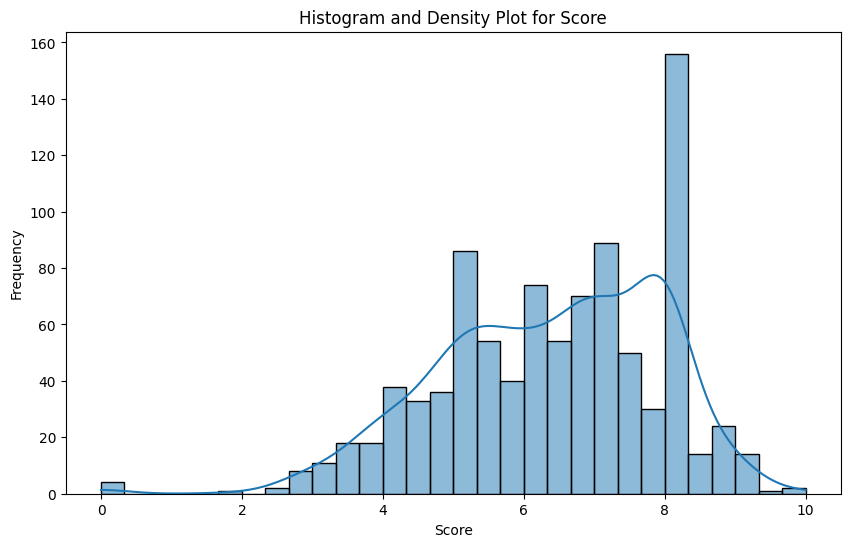

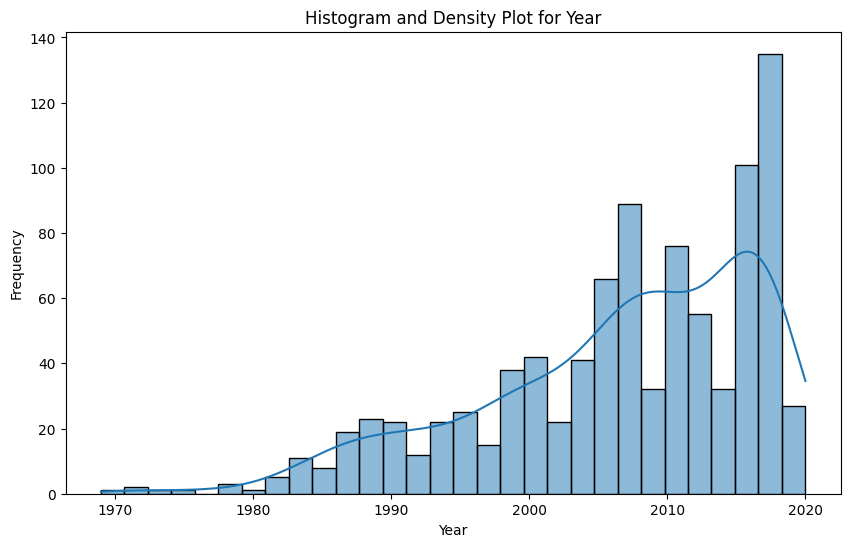

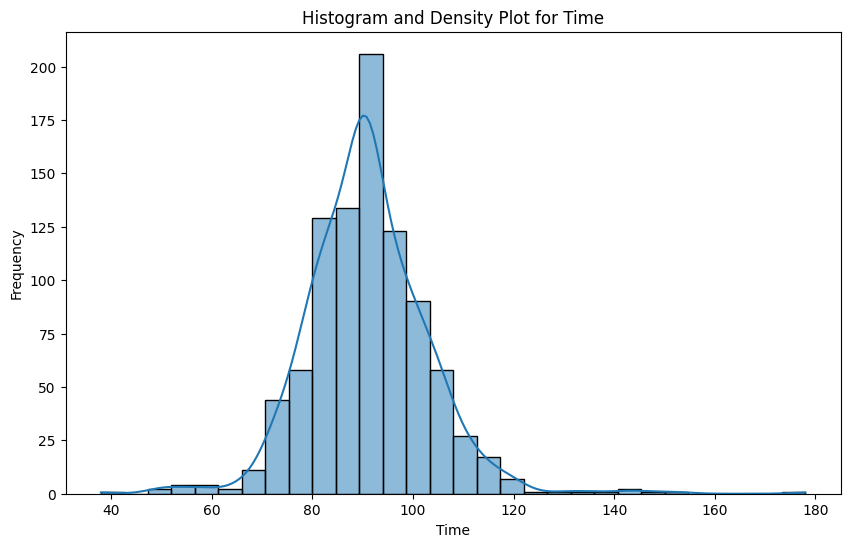

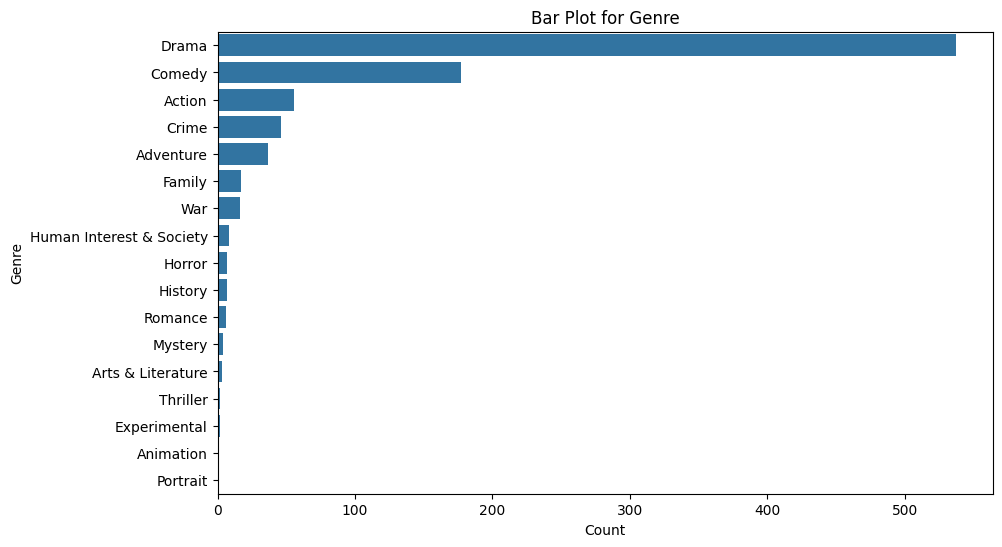

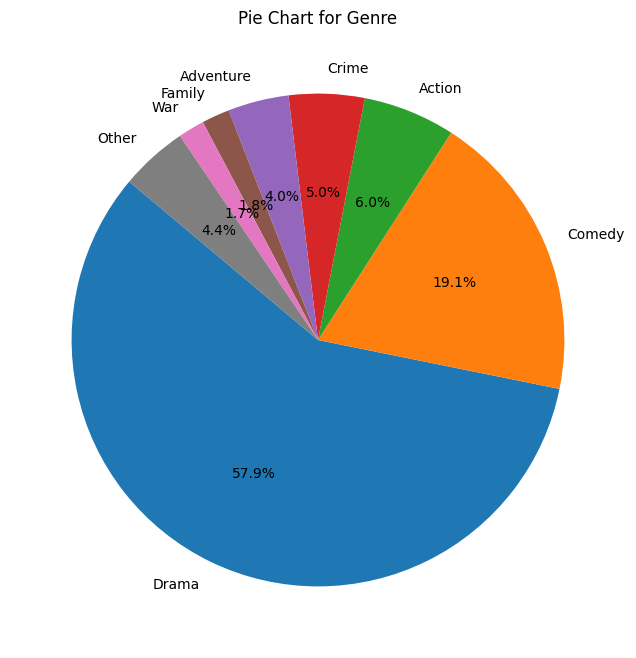

<Figure size 1200x1000 with 0 Axes>

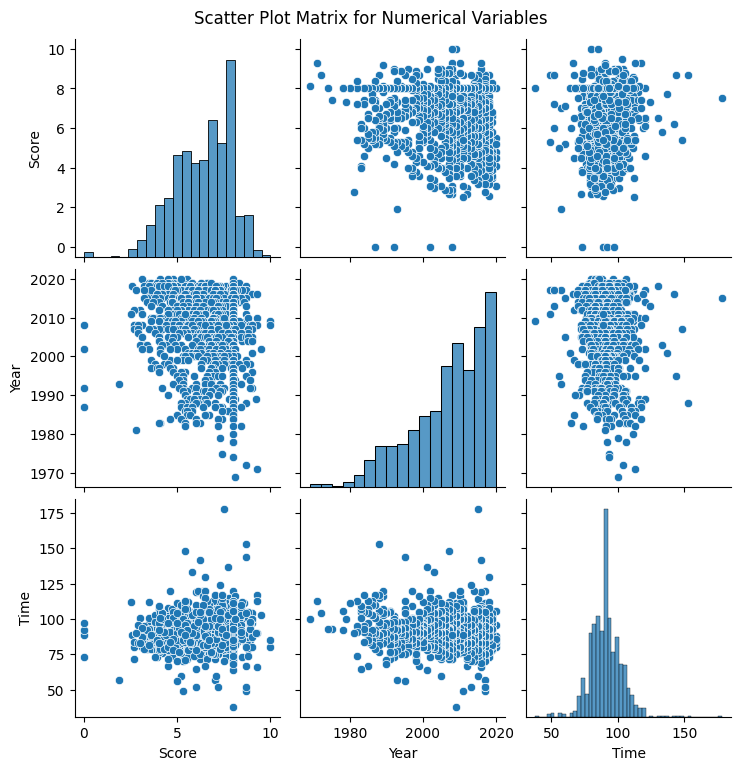

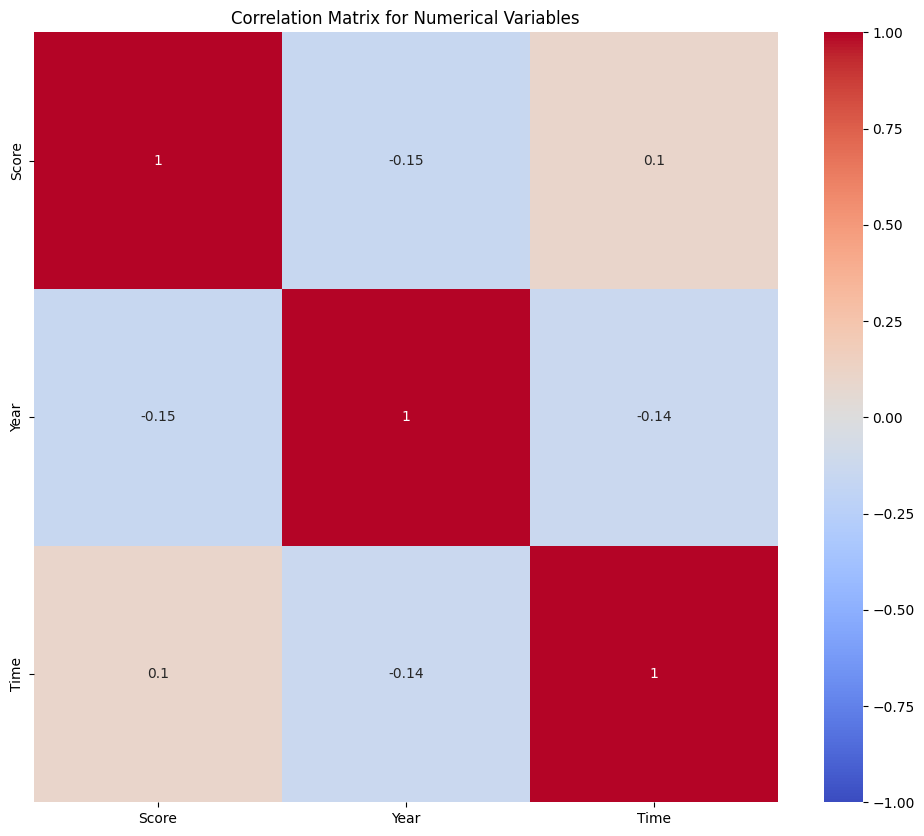

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feel free to add any desired methods to the class below this is a suggestion.
# Have fun trying to visualize your data

class DataVisualization:
    def __init__(self, df):
        self.df = df

    def plot_histograms(self, numerical_cols):
        """
        Plot histograms or density plots for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Iterate through each numerical column.
        2. Create a histogram or density plot for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        for col in numerical_cols:
            if col in self.df.columns:
                plt.figure(figsize=(10, 6))
                sns.histplot(self.df[col], kde=True, bins=30)
                plt.title(f'Histogram and Density Plot for {col}')
                plt.xlabel(col)
                plt.ylabel('Frequency')
                plt.show()

    def plot_categorical(self, categorical_cols):
        """
        Create bar plots or pie charts for categorical variables.

        Args:
            categorical_cols (list): A list of column names containing categorical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Iterate through each categorical column.
        2. Create a bar plot or pie chart for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        for col in categorical_cols:
            if col in self.df.columns:
                # Bar Plot
                plt.figure(figsize=(10, 6))
                sns.countplot(y=col, data=self.df, order=self.df[col].value_counts().index)
                plt.title(f'Bar Plot for {col}')
                plt.xlabel('Count')
                plt.ylabel(col)
                plt.show()

                # Pie Chart with grouping small categories
                counts = self.df[col].value_counts()
                total_counts = counts.sum()
                large_categories = counts[counts / total_counts > 0.01]
                small_categories = counts[counts / total_counts <= 0.01]

                grouped_counts = large_categories.copy()
                if not small_categories.empty:
                    grouped_counts['Other'] = small_categories.sum()

                plt.figure(figsize=(8, 8))
                grouped_counts.plot.pie(autopct='%1.1f%%', startangle=140, labels=grouped_counts.index)
                plt.title(f'Pie Chart for {col}')
                plt.ylabel('')
                plt.show()

    def plot_relationships(self, numerical_cols):
        """
        Generate scatter plots or correlation matrices to explore relationships between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots)

        TODO:
        1. Create a scatter plot matrix or correlation matrix for the numerical columns using Matplotlib or Seaborn.
        2. Set appropriate titles and labels for the plots.
        3. Display the plots.
        """
        if all(col in self.df.columns for col in numerical_cols):
            plt.figure(figsize=(12, 10))
            sns.pairplot(self.df[numerical_cols])
            plt.suptitle('Scatter Plot Matrix for Numerical Variables', y=1.02)
            plt.show()

            plt.figure(figsize=(12, 10))
            corr = self.df[numerical_cols].corr()
            sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
            plt.title('Correlation Matrix for Numerical Variables')
            plt.show()
        else:
            print("One or more numerical columns not found in DataFrame.")

# Example usage
numerical_cols = ['Score', 'Year', 'Time']
categorical_cols = ['Genre']
# Assuming you have a pandas DataFrame named 'df'
viz = DataVisualization(df)

# TODO: Call the plot_histograms method with the numerical_cols list
viz.plot_histograms(numerical_cols)

# TODO: Call the plot_categorical method with the categorical_cols list
viz.plot_categorical(categorical_cols)

# TODO: Call the plot_relationships method with the numerical_cols list
viz.plot_relationships(numerical_cols)

###4. **Genre Analysis**:
   - Create a word cloud or bar plot for genre distribution (you can use bidi library for persian text)
   - Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.
   - Analyze the distribution of movies across genres
   - Explore the relationship between genres and other variables

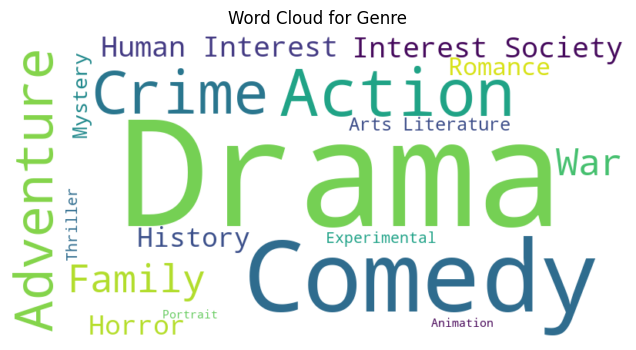

----------------------------------------FREQUENT WORD BY GENRE PREPROCESED PERSIAN TEXTS----------------------------------------
Top 10 words in Drama genre:
زندگ: 325
همسر: 212
پدر: 199
خانه: 179
فیل: 172
کار: 172
نا: 171
ازدواج: 154
زن: 149
دخ: 148
Top 10 words in Crime genre:
قتل: 28
زند: 24
نا: 23
زندگ: 21
سال: 21
زن: 19
کار: 18
دخ: 17
خانه: 17
خورشید: 17
Top 10 words in Human Interest & Society genre:
زندگ: 8
کار: 6
کودک: 5
شغل: 4
سرط: 4
تهر: 4
کشاورز: 4
شیرین: 4
همراه: 4
فیل: 4
Top 10 words in Comedy genre:
زندگ: 73
خانه: 69
ازدواج: 67
فیل: 56
پدر: 55
رضا: 54
دخ: 53
زن: 52
همسر: 50
کار: 47
Top 10 words in Adventure genre:
پدر: 14
محبوبه: 13
تصم: 12
داس: 11
زندگ: 11
خانواده: 11
دخ: 10
رویا: 10
ایر: 9
کار: 9
Top 10 words in Mystery genre:
سیاو: 10
مهتاج: 10
ملبورن: 4
حضور: 4
جنا: 4
داس: 3
فیل: 3
بین‌الملل: 3
فستیوال: 3
دس: 3
Top 10 words in War genre:
جنگ: 11
دشمن: 11
ایر: 9
اکبر: 8
قرار: 7
یح: 7
آب: 7
رزمندگ: 6
عراق: 6
سال: 6
Top 10 words in Action genre:
نا: 21
نیرو: 20
دس: 19
ما

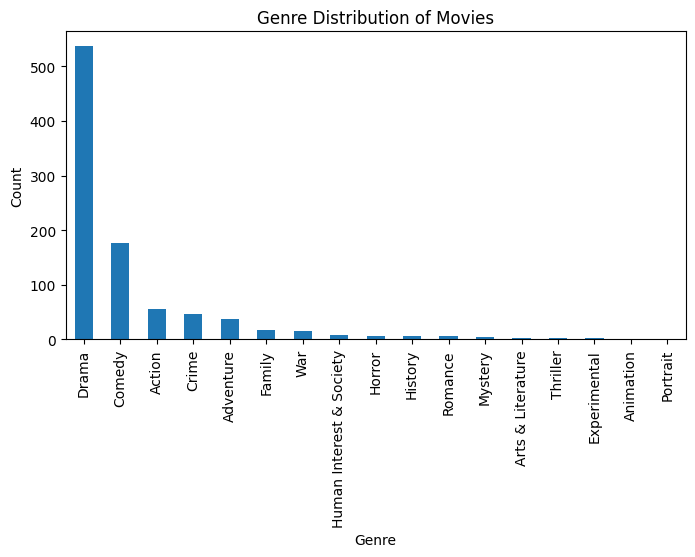

Total number of movies: 927
Most popular genre: Drama with 537 movies
Least popular genre: Animation with 1 movies
Genre
Drama                       537
Comedy                      177
Action                       56
Crime                        46
Adventure                    37
Family                       17
War                          16
Human Interest & Society      8
Horror                        7
History                       7
Romance                       6
Mystery                       4
Arts & Literature             3
Thriller                      2
Experimental                  2
Animation                     1
Portrait                      1
Name: count, dtype: int64


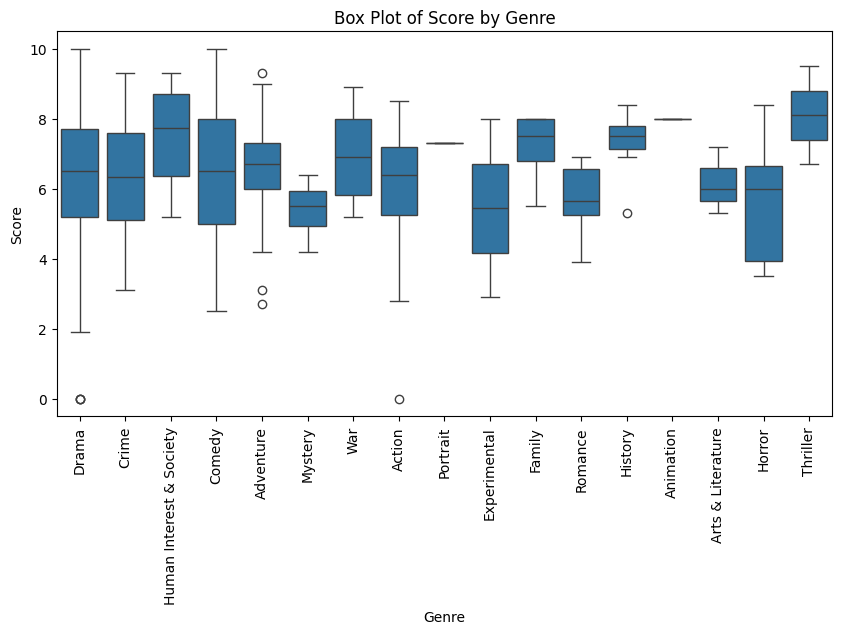

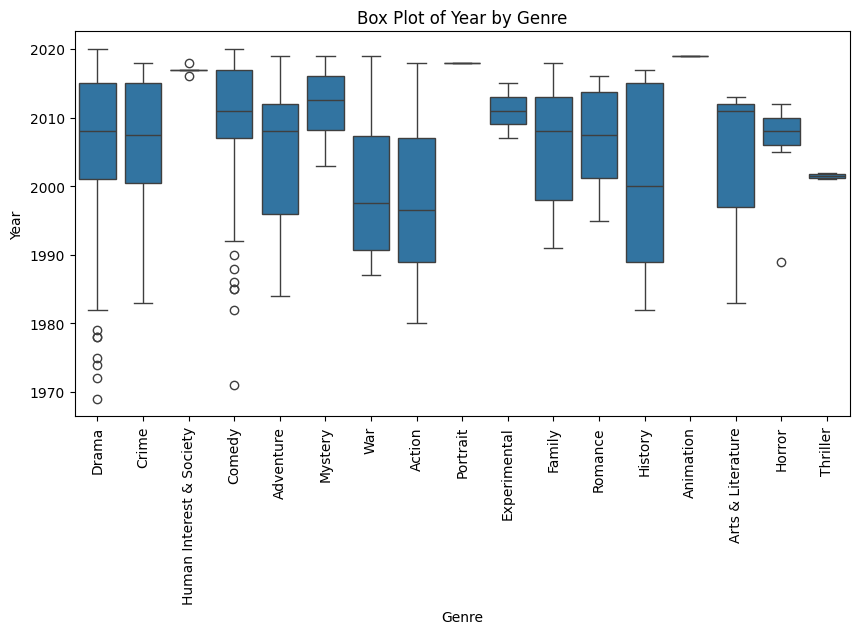

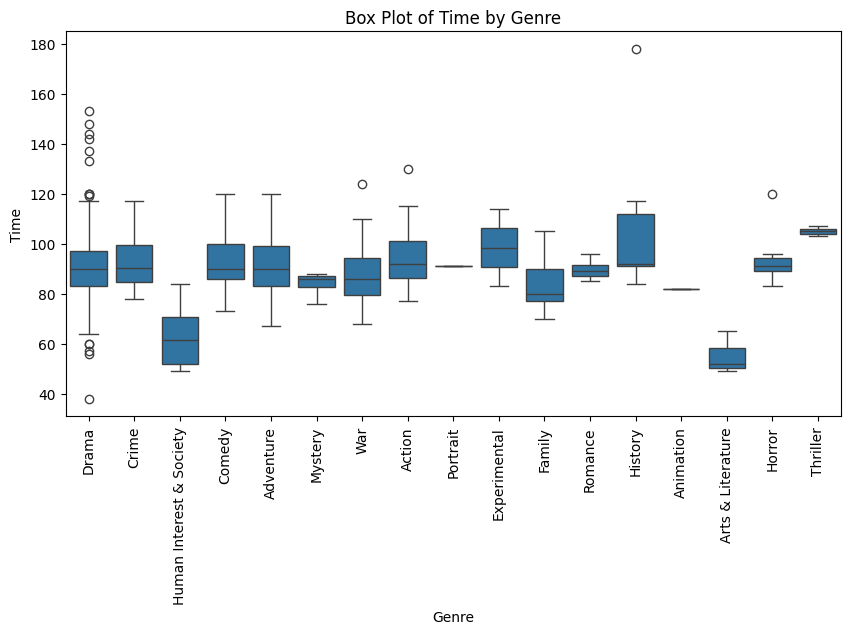

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bidi.algorithm import get_display
from collections import Counter
import nltk
import matplotlib.font_manager as fm

class GenreAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_genre_distribution(self, column):
        """
        Create a word cloud or bar plot for genre distribution.

        Args:
            column (str): The column name containing the genre information.

        Returns:
            None (displays the plot)

        TODO:
        1. Check if the data is in Persian or English.
        2. If the data is in Persian, use the bidi library to handle right-to-left text direction.
        3. Create a word cloud or bar plot for the genre distribution using Matplotlib or Seaborn.
        4. Set appropriate titles and labels for the plot.
        5. Display the plot.
        """
        # Word Cloud
        text = ' '.join(self.df[column])
        if any('\u0600' <= char <= '\u06FF' for char in text):
            text = get_display(text)

        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {column}')
        plt.show()

    def frequent_words_by_genre(self, content_column, genre_column):
        """
        Obtain the 10 most frequently occurring words for each genre, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the top 10 most frequent words for each genre)

        TODO:
        1. Group the data by genre.
        2. For each genre:
            a. Get the top 10 most frequent words from the initial summaries.
            b. Get the top 10 most frequent words from the preprocessed summaries (if available).
            c. Print the top 10 frequent words for both cases.
        """
        genres = self.df[genre_column].unique()
        
        for genre in genres:
            genre_df = self.df[self.df[genre_column] == genre]
            all_words = ' '.join(genre_df[content_column]).split()
            word_freq = Counter(all_words)
            most_common_words = word_freq.most_common(10)

            print(f"Top 10 words in {genre} genre:")
            for word, freq in most_common_words:
                # word = get_display(word)  # Handle right-to-left text direction
                print(f"{word}: {freq}")
            print("="*40)

    def analyze_genre_distribution(self, genre_column):
        """
        Analyze the distribution of movies across genres.

        Args:
            genre_column (str): The column name containing the genre information.

        Returns:
            None (prints the analysis of genre distribution)

        TODO:
        1. Calculate the count of movies for each genre.
        2. Determine the most and least popular genres based on the movie count.
        3. Print the analysis of genre distribution, including the most and least popular genres.
        """
        genre_counts = self.df[genre_column].value_counts()
        total_movies = genre_counts.sum()
        most_popular = genre_counts.idxmax()
        least_popular = genre_counts.idxmin()

        plt.figure(figsize=(8, 4))
        genre_counts.plot(kind='bar')
        plt.title(f'Genre Distribution of Movies')
        plt.xlabel(genre_column)
        plt.ylabel('Count')
        plt.show()

        print(f"Total number of movies: {total_movies}")
        print(f"Most popular genre: {most_popular} with {genre_counts[most_popular]} movies")
        print(f"Least popular genre: {least_popular} with {genre_counts[least_popular]} movies")
        print(genre_counts)

    def explore_genre_relationships(self, genre_column, other_columns):
        """
        Explore the relationship between genres and other variables.

        Args:
            genre_column (str): The column name containing the genre information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between genres and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        for col in other_columns:
            if col in self.df.columns:
                plt.figure(figsize=(10, 5))
                sns.boxplot(x=genre_column, y=col, data=self.df)
                plt.title(f'Box Plot of {col} by {genre_column}')
                plt.xlabel(genre_column)
                plt.ylabel(col)
                plt.xticks(rotation=90)
                plt.show()
            else:
                print(f"Column {col} not found in DataFrame.")


genre_analysis = GenreAnalysis(df)
genre_column = 'Genre'
notpreprop = 'Persian summary'
preprop = 'Preprocessed Persian'
other_columns = ['Score', 'Year', 'Time']

genre_analysis.visualize_genre_distribution(genre_column)
print("----------------------------------------FREQUENT WORD BY GENRE PREPROCESED PERSIAN TEXTS----------------------------------------")
genre_analysis.frequent_words_by_genre(preprop, genre_column)
print("----------------------------------------FREQUENT WORD BY GENRE NOT PREPROCESED PERSIAN TEXTS----------------------------------------")
genre_analysis.frequent_words_by_genre(notpreprop, genre_column)
print("----------------------------------------FREQUENT WORD BY GENRE PREPROCESED EGNLISH TEXTS----------------------------------------")
genre_analysis.frequent_words_by_genre('Preprocessed English', genre_column)
print("----------------------------------------FREQUENT WORD BY GENRE NOT PREPROCESED EGNLISH TEXTS----------------------------------------")
genre_analysis.frequent_words_by_genre('English summary', genre_column)

genre_analysis.analyze_genre_distribution(genre_column)
genre_analysis.explore_genre_relationships(genre_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis and whether this analysis prompted you to take any further steps; if so, explain those additional steps.

*Answer*: 
Based on the detailed analysis of frequent words by genre in both preprocessed and non-preprocessed texts: 
#### Preprocessed Text Analysis:
- **Common Themes Across Genres**: Words like "زندگی", "فیلم", and "نام" appear frequently across multiple genres, indicating their broad relevance. However, each genre also has unique words that highlight its specific themes.
- **Drama**: Common words such as "زندگی", "فیلم", and "نام" suggest that many drama movies revolve around personal stories and significant life events. The frequent appearance of "ازدواج" and "همسرش" highlights the importance of relationships and family dynamics in drama movies.
- **Crime**: Words like "زندان", "قتل", and "قاتل" dominate, indicating that crime movies often focus on criminal activities and their consequences. The word "سال" suggests that crime stories may explore events over extended periods.
- **Comedy**: Frequent words include "زندگی", "ازدواج", and "خانه", showing that comedies often revolve around everyday situations and personal relationships. The presence of personal names like "رضا" suggests character-driven narratives.
- **Adventure**: Words like "محبوبه", "تصمیم", and "پدر" suggest themes of love, choices, and family. The frequent appearance of "زندگی" and "داستان" indicates a narrative-driven genre focusing on significant journeys or quests.
- **War**: Words such as "جنگ", "دشمن", and "رزمندگان" are prevalent, reflecting the focus on conflict and military themes. The frequent mention of "ایران" suggests a nationalistic element in these films.
- **Mystery**: Words like "سیاوش" and "مهتاج" indicate that personal names and specific characters are significant in mystery movies. The frequent mention of "جنایت" and "حضور" points to themes of investigation and suspense.
- **Romance**: Frequent words include "هورام", "خزر", and "نگار", which may indicate romantic interests or significant characters. Words like "زندگی" and "ازدواج" are also common, reflecting the focus on romantic relationships.

#### Non-Preprocessed Text Analysis:
- **High Frequency of Stopwords**: The analysis of non-preprocessed texts shows that common Persian stopwords like "و", "به", and "می" dominate the word frequencies. This underscores the importance of thorough preprocessing to remove these common words for meaningful analysis.
- **Comparison with Preprocessed Texts**: Comparing the results with preprocessed texts highlights how preprocessing steps like stopword removal can significantly improve the clarity and relevance of the frequent words identified for each genre.

###5. **Time-based Analysis**:
   - Plot line or bar charts for movie releases over time
   - Investigate trends or patterns in movie releases
   - Analyze the relationship between release year and other variables

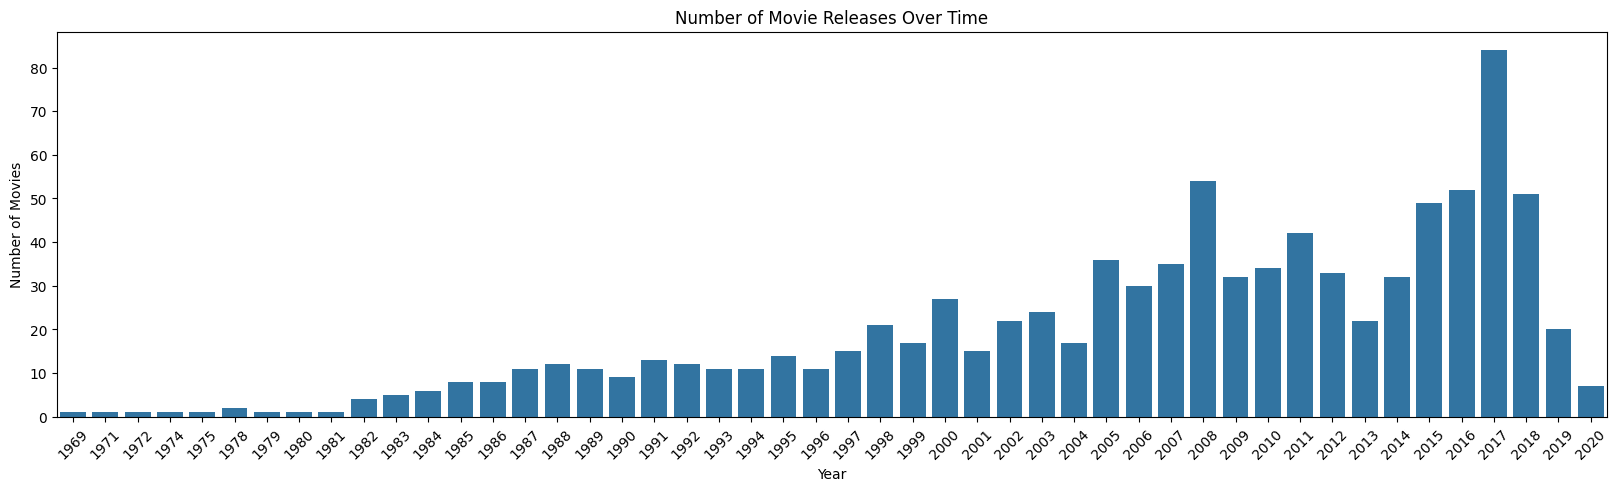

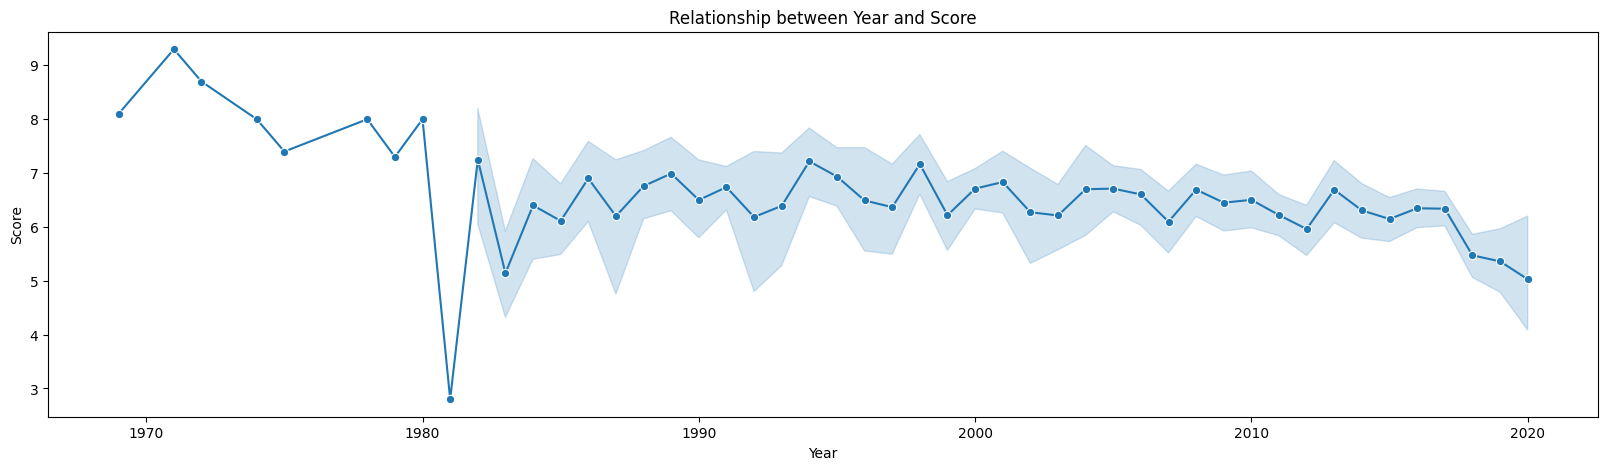

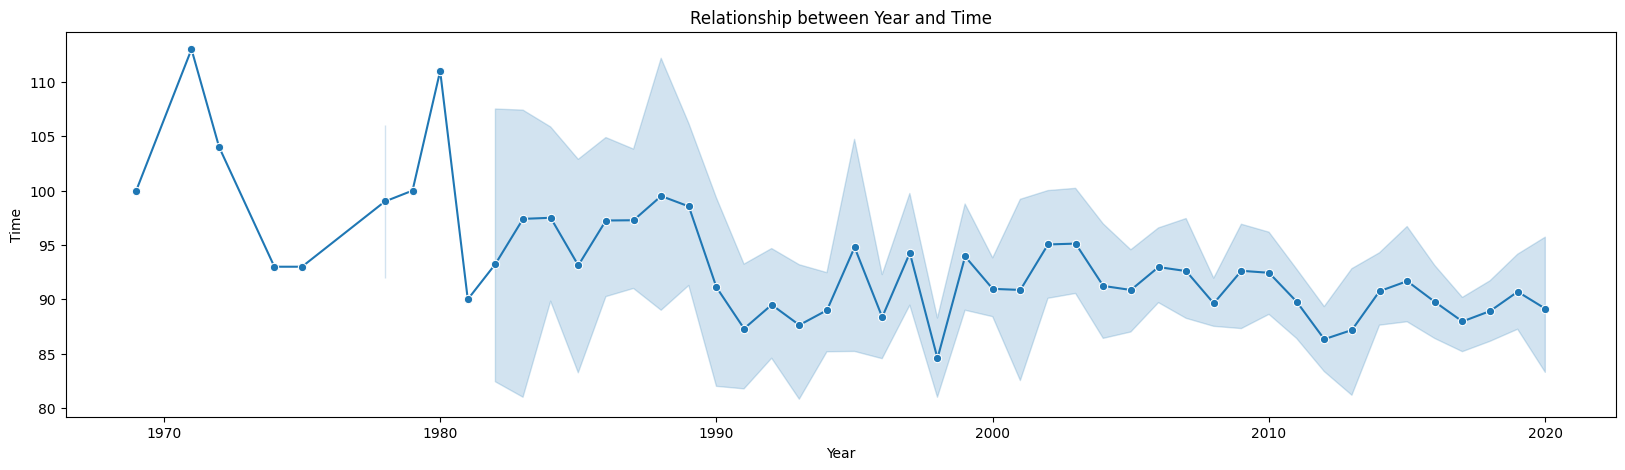

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

class TimeAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_movie_releases(self, time_column):
        """
        Plot line or bar charts for movie releases over time.

        Args:
            time_column (str): The column name containing the time or release year information.

        Returns:
            None (displays the plot)

        TODO:
        1. Check if the time_column contains continuous time data (e.g., years) or discrete time data (e.g., decades).
        2. Create a line or bar chart to show the distribution of movie releases over time using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plot.
        4. Display the plot.
        """
        plt.figure(figsize=(20, 5))
        sns.countplot(x=time_column, data=self.df)
        plt.title('Number of Movie Releases Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Movies')
        plt.xticks(rotation=45)
        plt.show()

    def explore_time_relationships(self, time_column, other_columns):
        """
        Analyze the relationship between release time and other variables.

        Args:
            time_column (str): The column name containing the time or release year information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between release time and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        for col in other_columns:
            if col in self.df.columns:
                plt.figure(figsize=(20, 5))
                sns.lineplot(x=time_column, y=col, data=self.df, marker='o')
                plt.title(f'Relationship between {time_column} and {col}')
                plt.xlabel('Year')
                plt.ylabel(col)
                # plt.xticks(rotation=45)
                plt.show()
            else:
                print(f"Column {col} not found in DataFrame.")



# Assuming you have a pandas DataFrame named 'df'
time_analysis = TimeAnalysis(df)
time_column = 'Year'
other_columns = ['Score', 'Time']
# TODO: Call the plot_movie_releases method with the time_column
time_analysis.plot_movie_releases(time_column)

# TODO: Call the explore_time_relationships method with the time_column and other_columns
time_analysis.explore_time_relationships(time_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.

*Answer*:

**Movie Releases Over Time**:
   - The bar chart depicting the number of movie releases over time shows a significant increase in movie production from the early 2000s onwards, with a noticeable peak around 2016. This trend suggests a growing film industry in recent years, possibly due to advancements in technology and increased investment in cinema.

**Relationship Between Year and Movie Duration**:
   - The line chart showing the relationship between the release year and movie duration reveals a decreasing pattern. Early years show higher variability in movie lengths, which stabilizes somewhat around the 90-minute mark in more recent years. This could indicate standardization in film production processes over time.

**Relationship Between Year and Movie Score**:
   - The line chart of relationship between release year and movie scores indicates a slight decline in average scores over the years. The early years (1970s) show higher average scores with more variability, whereas recent years have more consistent but slightly lower average scores. This trend might reflect changes in audience expectations, rating standards, or the diversity of movies being produced.





###6. **Rating Analysis**:
   - Visualize the distribution of ratings
   - Obtain the 10 most frequently occurring words for each Rating, based on both the initial summaries and the preprocessed summaries.
   - Explore the relationship between ratings and other variables


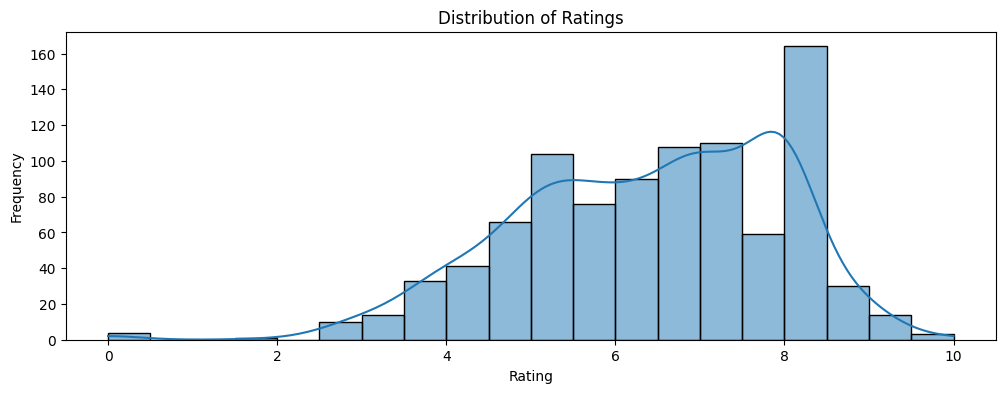


----------------------------------------FREQUENT WORDS BY GENRE ON PREPROCESSED PERSIAN TEXTS----------------------------------------
Top 10 words for rating range 0.0 - 1.0:
ناهید: 12
پرویز: 11
محسن: 10
همسر: 5
توکیو: 5
قصد: 4
زندگ: 4
کارخانه: 4
قرص: 4
مسعود: 3
Top 10 words for rating range 1.0 - 2.0:
چکمه: 2
زیبا: 2
دخترک: 1
تازه: 1
خریده_اس: 1
چیز: 1
دنیا: 1
برخورد: 1
پسربچه: 1
درم: 1
Top 10 words for rating range 2.0 - 3.0:
زندگ: 7
دخ: 4
جو: 4
دس: 4
ژاله: 4
نا: 3
شهر: 3
بیمارس: 3
حوادث: 3
معتمد: 3
Top 10 words for rating range 3.0 - 4.0:
پدر: 26
زند: 22
زندگ: 20
همسر: 19
فیل: 18
نا: 18
زن: 17
مرد: 16
دخ: 16
داود: 13
Top 10 words for rating range 4.0 - 5.0:
زن: 44
زندگ: 39
امیر: 38
فیل: 37
همسر: 34
پدر: 31
قرار: 27
ازدواج: 27
نا: 25
کار: 25
Top 10 words for rating range 5.0 - 6.0:
زندگ: 87
فیل: 60
همسر: 60
داس: 51
رضا: 46
زن: 46
پدر: 46
ازدواج: 45
سال: 43
کار: 40
Top 10 words for rating range 6.0 - 7.0:
زندگ: 142
نا: 74
پدر: 73
فیل: 68
کار: 65
خانه: 64
مادر: 61
خانواده: 60
دخ: 60
ه

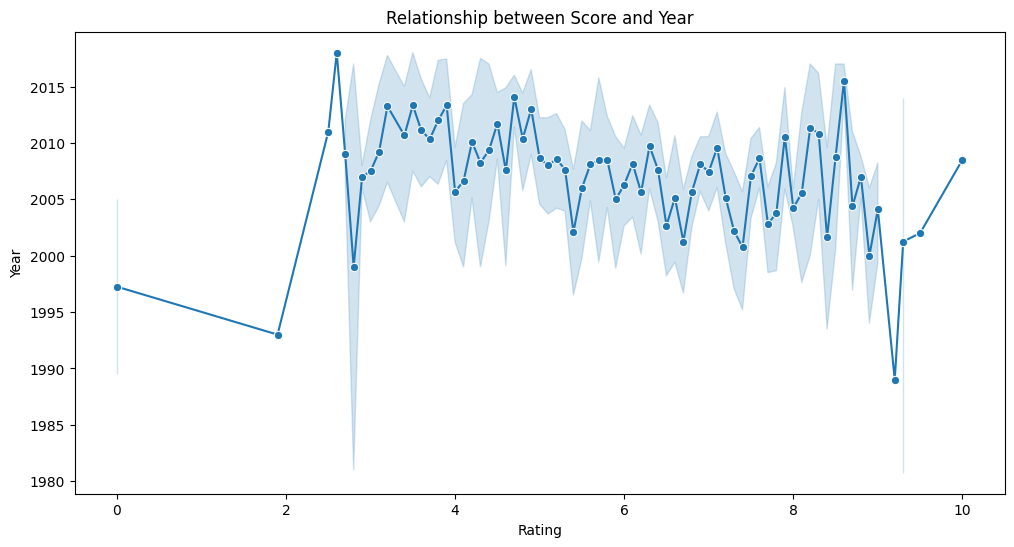

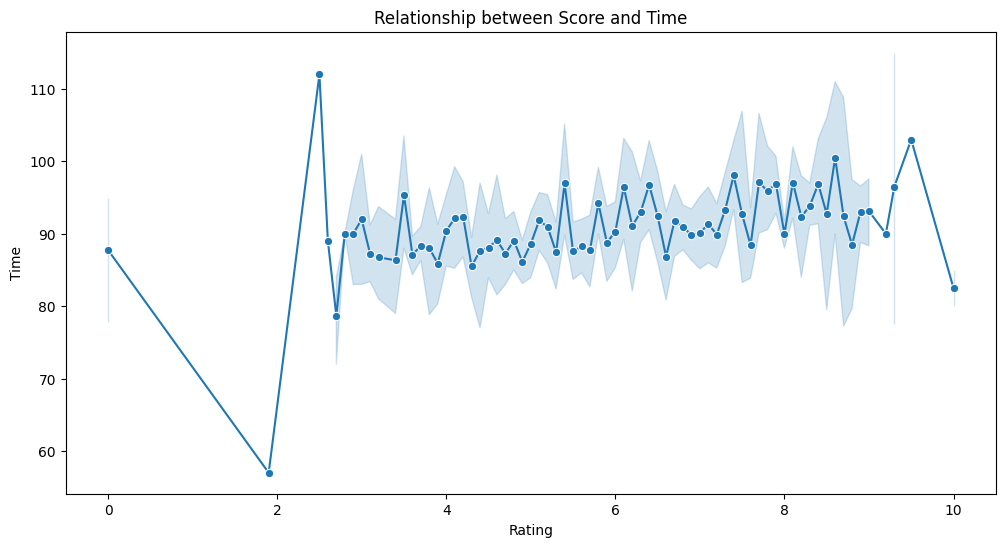

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

class RatingAnalysis:
    def __init__(self, df):
        self.df = df

    def visualize_rating_distribution(self, rating_column):
        """
        Visualize the distribution of ratings.

        Args:
            rating_column (str): The column name containing the rating information.

        Returns:
            None (displays the plot)

        TODO:
        1. Create a histogram or density plot to visualize the distribution of ratings using Matplotlib or Seaborn.
        2. Set appropriate titles and labels for the plot.
        3. Display the plot.
        """
        plt.figure(figsize=(12, 4))
        sns.histplot(self.df[rating_column], bins=20, kde=True)
        plt.title('Distribution of Ratings')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.show()

    def frequent_words_by_rating(self, content_column, rating_column, n=10):
        """
        Obtain the 10 most frequently occurring words for each rating, based on both the initial summaries and the preprocessed summaries.

        Args:
            content_column (str): The column name containing the text data.
            rating_column (str): The column name containing the rating information.
            n (int): The number of most frequent words to obtain (default is 10).

        Returns:
            None (prints the top n frequent words for each rating)

        TODO:
        1. Group the data by rating.
        2. For each rating:
            a. Get the top n most frequent words from the initial summaries.
            b. Get the top n most frequent words from the preprocessed summaries (if available).
            c. Print the top n frequent words for both cases.
        """
        bins = np.linspace(0, 10, 11)
        self.df['RatingBin'] = np.digitize(self.df[rating_column], bins) - 1

        for i in range(len(bins) - 1):
            subset = self.df[self.df['RatingBin'] == i]
            if not subset.empty:
                words = ' '.join(subset[content_column].dropna()).split()
                most_common_words = Counter(words).most_common(n)
                print(f"Top {n} words for rating range {bins[i]} - {bins[i + 1]}:")
                for word, freq in most_common_words:
                    print(f"{word}: {freq}")
                print("="*40)


    def explore_rating_relationships(self, rating_column, other_columns):
        """
        Explore the relationship between ratings and other variables.

        Args:
            rating_column (str): The column name containing the rating information.
            other_columns (list): A list of column names to explore relationships with.

        Returns:
            None (displays plots or prints analysis)

        TODO:
        1. Iterate through each column in other_columns.
        2. Generate appropriate plots or calculations to explore the relationship between ratings and the selected column.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots or print the analysis.
        """
        for col in other_columns:
            if col in self.df.columns:
                plt.figure(figsize=(12, 6))
                sns.lineplot(x=rating_column, y=col, data=self.df, marker='o')
                plt.title(f'Relationship between {rating_column} and {col}')
                plt.xlabel('Rating')
                plt.ylabel(col)
                plt.show()
            else:
                print(f"Column {col} not found in DataFrame.")



rating_analysis = RatingAnalysis(df)
rating_column = 'Score'
content_column1 = 'Persian summary'
content_column2 = 'Preprocessed Persian'
other_columns = ['Year', 'Time']
# TODO: Call the visualize_rating_distribution method with the rating_column
rating_analysis.visualize_rating_distribution(rating_column)

# TODO: Call the frequent_words_by_rating method with the content_column and rating_column
print("\n----------------------------------------FREQUENT WORDS BY GENRE ON PREPROCESSED PERSIAN TEXTS----------------------------------------")
rating_analysis.frequent_words_by_rating(content_column2, rating_column)
print("\n----------------------------------------FREQUENT WORDS BY GENRE ON NOT PREPROCESSED PERSIAN TEXTS----------------------------------------")
rating_analysis.frequent_words_by_rating(content_column1, rating_column)
print("\n----------------------------------------FREQUENT WORDS BY GENRE ON PREPROCESSED EGNLISH TEXTS----------------------------------------")
rating_analysis.frequent_words_by_rating('Preprocessed English', rating_column)
print("\n----------------------------------------FREQUENT WORDS BY GENRE ON NOT PREPROCESSED EGNLISH TEXTS----------------------------------------")
rating_analysis.frequent_words_by_rating('English summary', rating_column)

# TODO: Call the explore_rating_relationships method with the rating_column and other_columns
rating_analysis.explore_rating_relationships(rating_column, other_columns)

In one paragraph, briefly explain what you found interesting in your analysis.

*Answer*:

**Distribution of Ratings**:
   - The histogram of ratings shows a right-skewed distribution, with a large number of movies receiving high ratings between 7 and 8. There are fewer movies with ratings below 4, indicating that most movies are well-received by audiences.

**Relationship Between Rating and Movie Duration**:
   - The line chart showing the relationship between ratings and movie duration shows an uneven trend. Movies with very low ratings (below 2) tend to have shorter durations, while movies with higher ratings (around 7 to 8) generally have a consistent duration of around 90 minutes. This suggests that longer movies might not necessarily be better received.

**Relationship Between Rating and Release Year**:
   - The line chart showing the relationship between ratings and release year indicates that movies with ratings above 4 are mostly from the early 2000s onwards. There is a noticeable drop in average ratings around the 4-5 range for movies released in the mid-2000s, but overall, movies from the 2010s tend to have higher ratings.

**Frequent Words by Rating Ranges**:
   - The analysis of frequent words by rating ranges reveals some interesting patterns. For example, highly rated movies (9-10) frequently mention terms like "پیرمرد" , "فرشته" , and "مجید" , while lower-rated movies (0-1) frequently mention specific names like "ناهید" , "پرویز" , and "محسن" . This suggests that the themes or characters in highly rated movies differ significantly from those in lower-rated movies.
   - For non-preprocessed texts, common Persian stopwords such as "و" , "به" , and "می"  dominate across all rating ranges, highlighting the importance of text preprocessing for meaningful analysis.

###7. **Correlation and Multivariate Analysis**:
   - Calculate correlation coefficients between numerical variables
   - Use scatter plot matrices or pair plots for multivariate visualization
   - Employ dimensionality reduction techniques (e.g., PCA) for better visualization

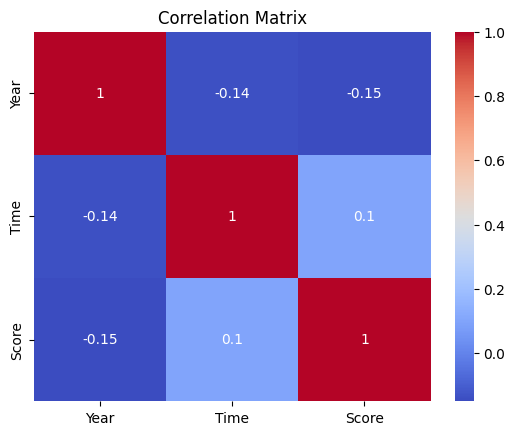

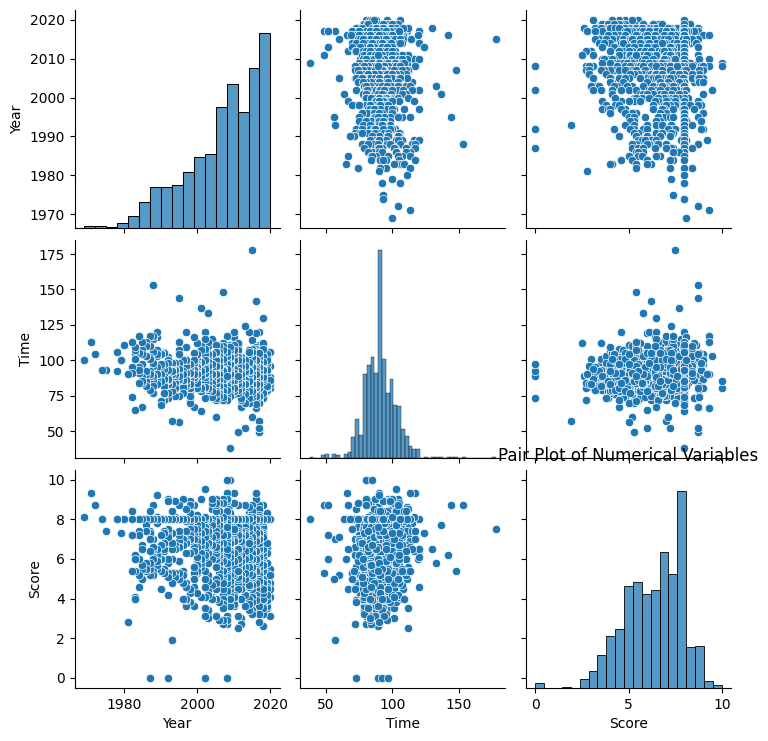

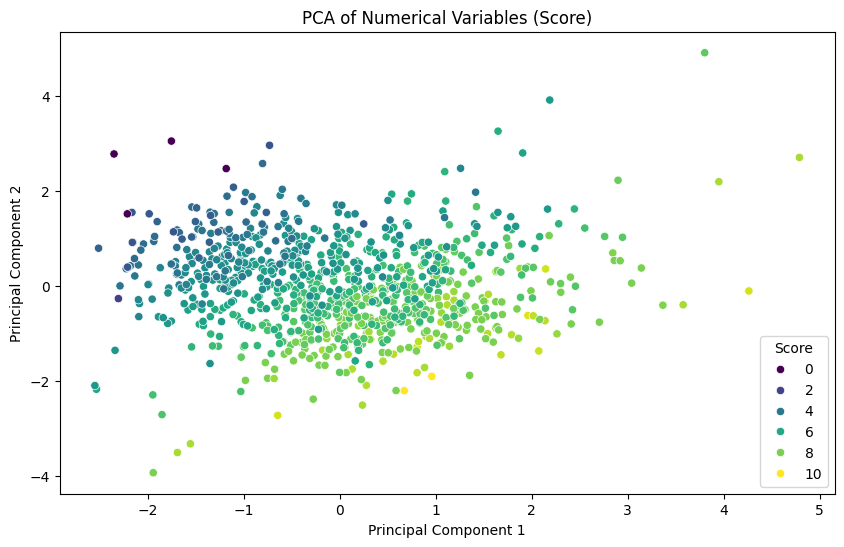

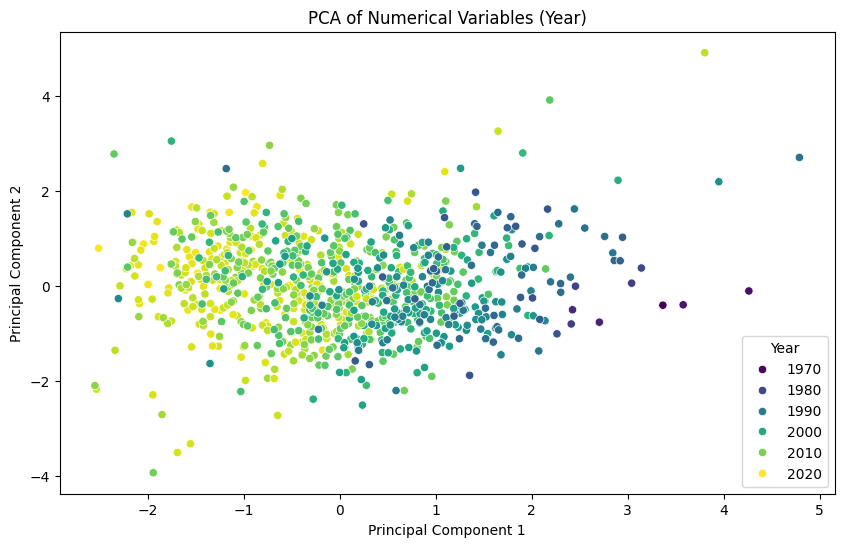

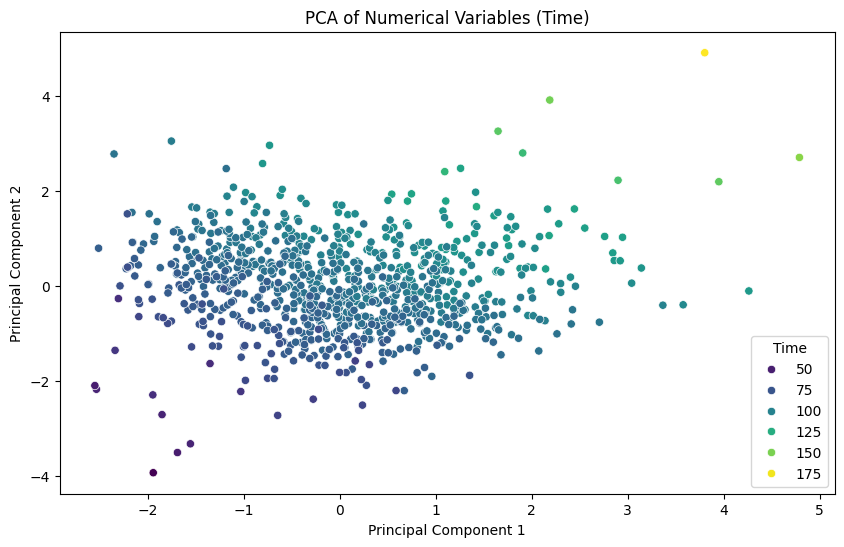

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
class MultivariateAnalysis:
    def __init__(self, df):
        self.df = df

    def calculate_correlations(self, numerical_cols):
        """
        Calculate correlation coefficients between numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the correlation matrix)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Calculate the correlation matrix between the numerical columns.
        3. Print the correlation matrix.
        """
        numerical_df = self.df[numerical_cols]
        corr_matrix = numerical_df.corr()
        # print("Correlation Matrix:")
        # print(corr_matrix)
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.title("Correlation Matrix")
        plt.show()

    def visualize_multivariate(self, numerical_cols):
        """
        Use scatter plot matrices or pair plots for multivariate visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the multivariate plot)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Create a scatter plot matrix or pair plot using Matplotlib or Seaborn for multivariate visualization.
        3. Set appropriate titles and labels for the plot.
        4. Display the plot.
        """
        numerical_df = self.df[numerical_cols]
        sns.pairplot(numerical_df)
        plt.title("Pair Plot of Numerical Variables")
        plt.show()

    def dimensionality_reduction(self, numerical_cols, target_column=None):
        """
        Employ dimensionality reduction techniques (e.g., PCA) for better visualization.

        Args:
            numerical_cols (list): A list of column names containing numerical data.
            target_column (str, optional): The column name containing the target variable (if applicable).

        Returns:
            None (displays the dimensionality-reduced plot)

        TODO:
        1. Select the numerical columns from the DataFrame.
        2. Perform standardization on the numerical data.
        3. Apply Principal Component Analysis (PCA) or another dimensionality reduction technique.
        4. If a target_column is provided, color the data points based on the target variable.
        5. Create a scatter plot for the first two principal components.
        6. Set appropriate titles and labels for the plot.
        7. Display the plot.
        """
        numerical_df = self.df[numerical_cols]
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(numerical_df)

        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_data)

        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        if target_column:
            pca_df[target_column] = self.df[target_column].values

        plt.figure(figsize=(10, 6))
        if target_column:
            sns.scatterplot(x='PC1', y='PC2', hue=target_column, data=pca_df, palette='viridis')
        else:
            sns.scatterplot(x='PC1', y='PC2', data=pca_df, palette='viridis')
        plt.title('PCA of Numerical Variables ({target_column})'.format(target_column=target_column))
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

df.dropna(subset=['Time'], inplace=True)
# Example usage
numerical_cols = ['Year', 'Time', 'Score']  # Add your numerical columns here

# Assuming you have a pandas DataFrame named 'df'
multivariate_analysis = MultivariateAnalysis(df)

# TODO: Call the calculate_correlations method with the numerical_cols list
multivariate_analysis.calculate_correlations(numerical_cols)

# TODO: Call the visualize_multivariate method with the numerical_cols list
multivariate_analysis.visualize_multivariate(numerical_cols)

# TODO: Call the dimensionality_reduction method with the numerical_cols list and target_column
multivariate_analysis.dimensionality_reduction(numerical_cols, 'Score')
multivariate_analysis.dimensionality_reduction(numerical_cols, 'Year')
multivariate_analysis.dimensionality_reduction(numerical_cols, 'Time')

In one paragraph, briefly explain what you found interesting in your analysis.

*Answer*:
In this part i want to focus on the PCA analysis:

**PCA of Numerical Variables (Time)**

The majority of the movies have a runtime between 75 to 125 minutes, with some outliers having longer runtimes. The plot shows a broad distribution without a clear clustering, indicating that runtime doesn't significantly impact the overall spread of the data in the principal component space.

**PCA of Numerical Variables (Year)**

We observe a more noticeable clustering pattern, where older movies (1970s) are more distinct from the newer ones (2000s onward). This indicates that the release year has a more significant impact on the principal component space, suggesting changes in movie characteristics over time.

**PCA of Numerical Variables (Score)**

There is a gradual transition from lower scores (darker colors) to higher scores (lighter colors), but without strong clustering. This indicates that while the score has some influence on the distribution, it doesn't create distinct groupings in the principal component space.

###8. **Outlier Detection**:
   - Identify and investigate potential outliers
   - Determine if outliers are genuine or result from data issues

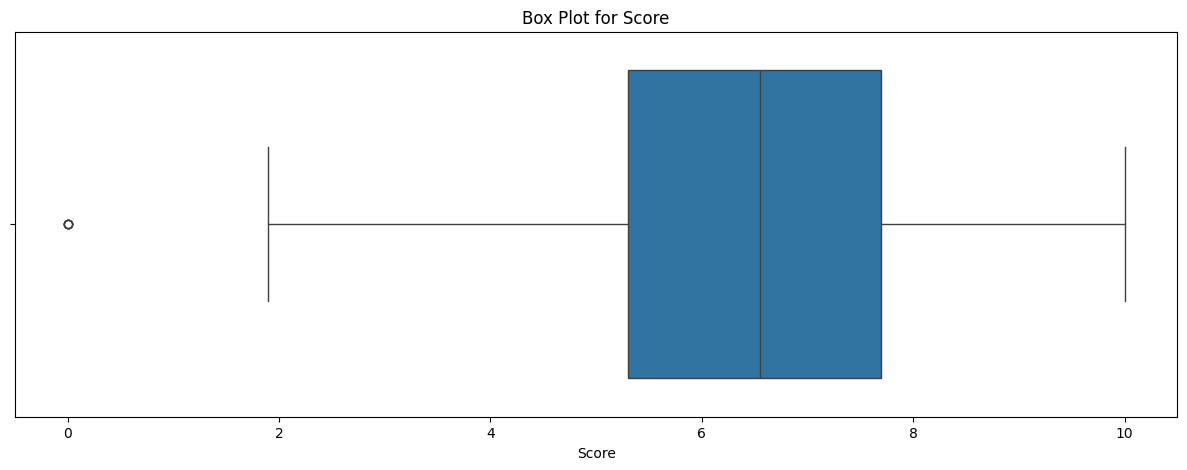

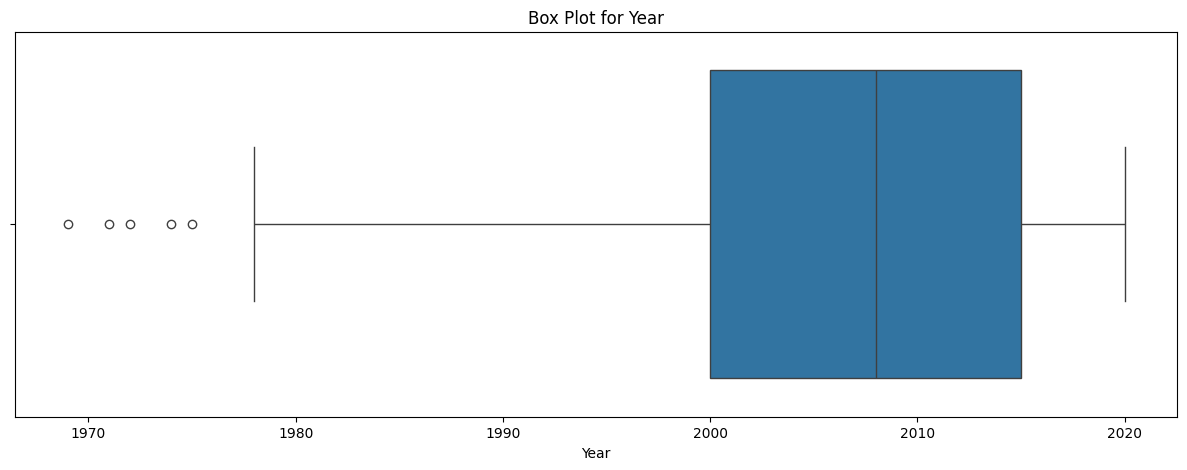

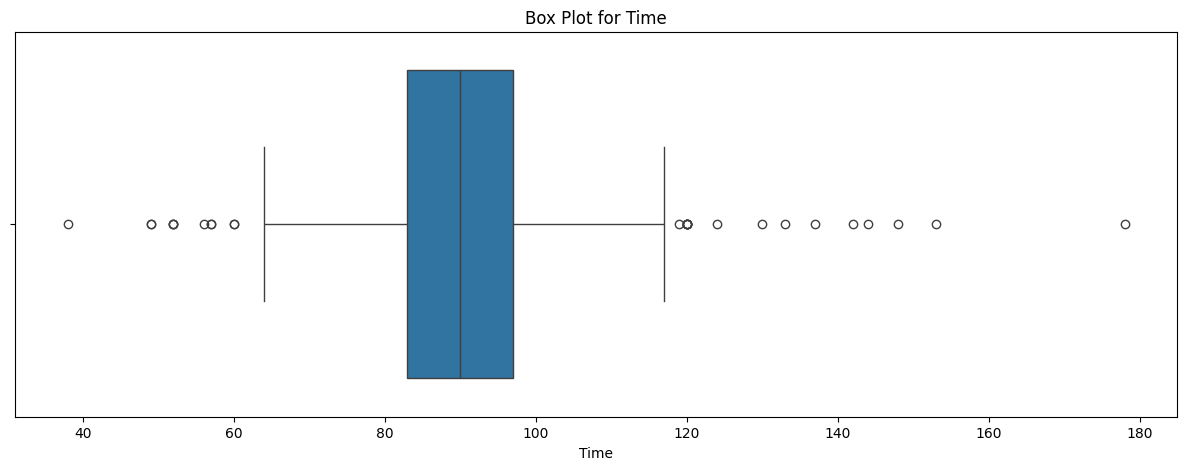

Potential outliers for Score:
      Score
177     0.0
831     0.0
1055    0.0
1306    0.0
Total outliers identified: 4

Potential outliers for Year:
      Year
1427  1975
1429  1974
1430  1972
1431  1971
1432  1969
Total outliers identified: 5

Potential outliers for Time:
       Time
95    130.0
123    60.0
147   120.0
157   148.0
168   120.0
211   120.0
227   142.0
328    49.0
329    57.0
330    52.0
334    52.0
397   119.0
405   178.0
485   120.0
585   124.0
586    52.0
670    49.0
785    38.0
995    60.0
1038  133.0
1091  137.0
1234  120.0
1261   56.0
1268  144.0
1298   57.0
1361  120.0
1370  153.0
Total outliers identified: 27



In [17]:
# Feel free to add any desired methods to the class below this is a suggestion you can change it anyway you like!
class OutlierDetection:
    def __init__(self, df):
        self.df = df

    def identify_outliers(self, numerical_cols):
        """
        Identify and visualize potential outliers for numerical variables.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (displays the plots for identifying outliers)

        TODO:
        1. Iterate through each numerical column.
        2. Create a boxplot for each column using Matplotlib or Seaborn.
        3. Set appropriate titles and labels for the plots.
        4. Display the plots.
        """
        for col in numerical_cols:
            if col in self.df.columns:
                plt.figure(figsize=(15, 5))
                sns.boxplot(x=self.df[col])
                plt.title(f'Box Plot for {col}')
                plt.xlabel(col)
                plt.show()

    def investigate_outliers(self, numerical_cols):
        """
        Investigate potential outliers and determine if they are genuine or result from data issues.

        Args:
            numerical_cols (list): A list of column names containing numerical data.

        Returns:
            None (prints the analysis of potential outliers)

        TODO:
        1. Iterate through each numerical column.
        2. Identify potential outliers using appropriate techniques (e.g., IQR, z-score).
        3. Investigate the potential outliers by examining their values and associated data.
        4. Determine if the potential outliers are genuine or result from data issues.
        5. Print the analysis of potential outliers, including any insights or recommendations.
        """
        for col in numerical_cols:
            if col in self.df.columns:
                Q1 = self.df[col].quantile(0.25)
                Q3 = self.df[col].quantile(0.75)
                IQR = Q3 - Q1

                outliers = self.df[(self.df[col] < (Q1 - 1.5 * IQR)) | (self.df[col] > (Q3 + 1.5 * IQR))]

                print(f"Potential outliers for {col}:")
                print(outliers[[col]])
                print(f"Total outliers identified: {len(outliers)}\n")

                # # Further investigation
                # for index, row in outliers.iterrows():
                #     print(f"Outlier in {col}: Index {index}, Value {row[col]}")
                print("="*40)


numerical_cols = ['Score', 'Year', 'Time']  # Add your numerical columns here

# Assuming you have a pandas DataFrame named 'df'
outlier_detection = OutlierDetection(df)

# TODO: Call the identify_outliers method with the numerical_cols list
outlier_detection.identify_outliers(numerical_cols)

# TODO: Call the investigate_outliers method with the numerical_cols list
outlier_detection.investigate_outliers(numerical_cols)


##### **Outlier Detection and Handling**

Upon analyzing the outliers in the dataset, it was observed that there are four outliers in the "Score" column, all with a value of 0.0. These outliers are likely due to data entry errors or missing information, as it is unusual for a movie to have a score of 0.0. Therefore, these outliers are considered data issues and will be removed from the dataset to ensure the accuracy and reliability of our analysis.

In contrast, the outliers identified in the "Year" and "Time" columns are deemed genuine. The outliers in the "Year" column, ranging from 1969 to 1975, reflect movies released during those years. Similarly, the outliers in the "Time" column, which range from 38 minutes to 178 minutes, represent the diversity in movie lengths. These outliers provide valuable insights into the variability of the data and will be retained in the dataset for further analysis.

In [18]:
outlier_indices_score = [177, 831, 1055, 1306]
df = df.drop(outlier_indices_score)

###9. **Data Balancing and Feature Engineering**:

*   Genre Mapping and Balancing

*   Resampling Considerations
*   Encoding Categorical Variables




It is possible to map different genres that are similar to a set of base genres. This approach can help avoid an excessive number of unbalanced categories. Here, we provide a mapping of genres that you can utilize if you find it useful. To further maintain a balanced dataset, you can explore resampling techniques.



This is the mapping I came up with, you can change it if you like.

In [19]:
genre_dict = {
    'Romance': 'Drama',
    'Animation': 'Comedy',
    'Crime': 'Action',
    'War': 'Action',
    'Adventure': 'Action',
    'Mystery': 'Action',
    'Horror': 'Action',
    'Thriller': 'Action',
    'Human Interest & Society': 'Culture',
    'Arts & Literature': 'Culture',
    'Family': 'Culture',
    'History': 'Culture',
    'Architecture': 'Culture',
    'Experimental': 'Culture',
    'Music': 'Culture',
    'Portrait': 'Culture'
}

df['New_Genre'] = df['Genre'].map(genre_dict).fillna(df['Genre'])


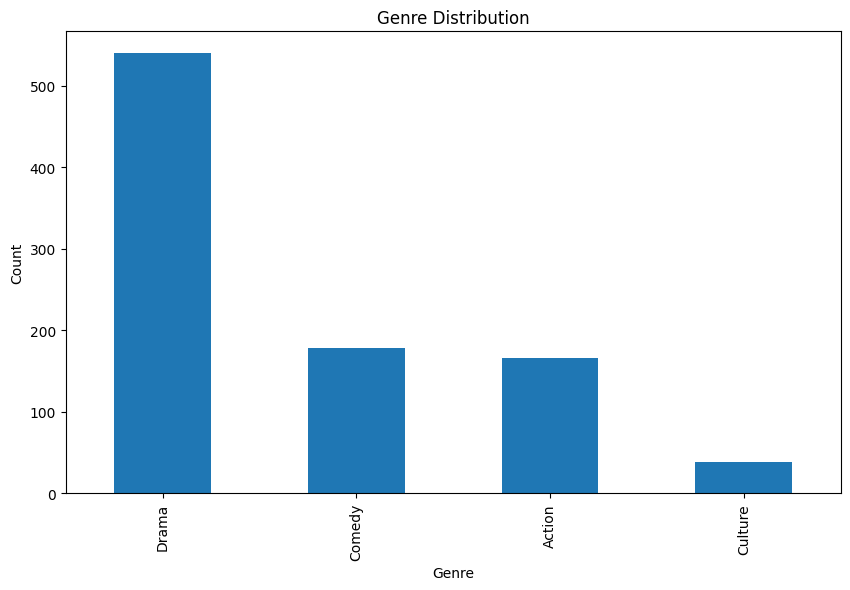

In [20]:
genre_counts = df['New_Genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


However, it is crucial to exercise caution when applying resampling methods. While these techniques can help balance the dataset, oversampling should not be excessive, as it may lead to model overfitting due to the model being exposed to repeated instances of the data. If you choose to train your model on an oversampled version of the dataset, ensure that your test dataset remains unaffected by the resampling process. It is recommended to split the data into an 80/20 ratio (train/test) before proceeding with resampling. (seed=42)



In [21]:
# Based on above description, you can modify the given class.
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

class DataResampling:
    def __init__(self, df, target_col):
        self.df = df
        self.target_col = target_col

    def split_data(self, test_size=0.2, random_state=14032):
        """
        Split the dataset into training and testing sets.

        Args:
            test_size (float): The proportion of the dataset to include in the test split (default: 0.2).
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_train, X_test, y_train, y_test)
                X_train (pandas.DataFrame): Training features.
                X_test (pandas.DataFrame): Testing features.
                y_train (pandas.Series): Training target.
                y_test (pandas.Series): Testing target.

        TODO:
        1. Separate the target variable from the features.
        2. Split the dataset into training and testing sets using the provided test_size and random_state.
        3. Return the training and testing features and targets.
        """
        X = self.df.drop(columns=[self.target_col])
        y = self.df[self.target_col]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test

    def resample_data(self, X_train, y_train,threshold=200, random_state=42):
        """
        Apply resampling techniques to balance the training dataset.

        Args:
            X_train (pandas.DataFrame): Training features.
            y_train (pandas.Series): Training target.
            random_state (int): The random seed for reproducibility (default: 42).

        Returns:
            tuple: (X_resampled, y_resampled)
                X_resampled (pandas.DataFrame): Resampled training features.
                y_resampled (pandas.Series): Resampled training target.

        TODO:
        1. Identify the class imbalance in the training data.
        2. Apply appropriate resampling techniques (e.g., RandomOverSampler, SMOTE) to balance the classes.
        3. Return the resampled training features and target.
        """
        max_size = threshold
        lst = []
        y_lst = []

        for class_index, group in y_train.groupby(y_train):
            X_grp = X_train[y_train == class_index]
            y_grp = y_train[y_train == class_index]
            if len(group) > max_size:
                lst.append(X_grp.sample(max_size, random_state=random_state))
                y_lst.append(y_grp.sample(max_size, random_state=random_state))
            else:
                lst.append(X_grp)
                y_lst.append(y_grp)

        X_train = pd.concat(lst)
        y_train = pd.concat(y_lst)

        lst = [X_train]
        y_lst = [y_train]
        for class_index, group in y_train.groupby(y_train):
            X_grp = X_train[y_train == class_index]
            y_grp = y_train[y_train == class_index]
            if len(group) < max_size:
                sample_size = max_size - len(group)
                lst.append(X_grp.sample(sample_size, replace=True, random_state=random_state))
                y_lst.append(y_grp.sample(sample_size, replace=True, random_state=random_state))

        X_resampled = pd.concat(lst)
        y_resampled = pd.concat(y_lst)

        return X_resampled, y_resampled

# Before data split and resampling I want to get rid of unnecessary columns for training
# df = df.drop(columns=['Link','EN_title','PENGLISH_title','PERSIAN_title','Score','Time','RatingBin','Genre', 'Year'])

target_col = 'New_Genre'
data_resampling = DataResampling(df, target_col)

# TODO: Call the split_data method to split the dataset into training and testing sets
X_train, X_test, y_train, y_test = data_resampling.split_data()

# TODO: Call the resample_data method to resample the training data
X_resampled, y_resampled = data_resampling.resample_data(X_train, y_train)

##### Verifying the resampling

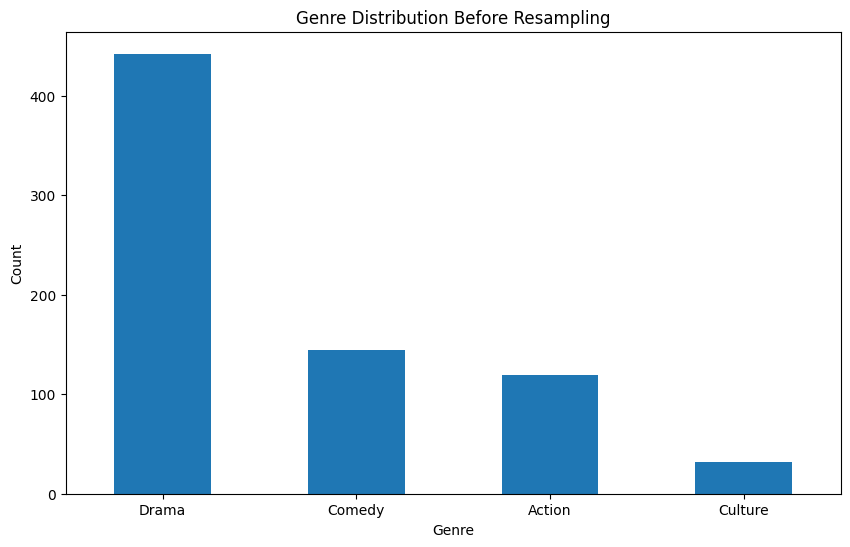

In [22]:
genre_counts_resampled = y_train.value_counts()
plt.figure(figsize=(10, 6))
genre_counts_resampled.plot(kind='bar')
plt.title('Genre Distribution Before Resampling')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

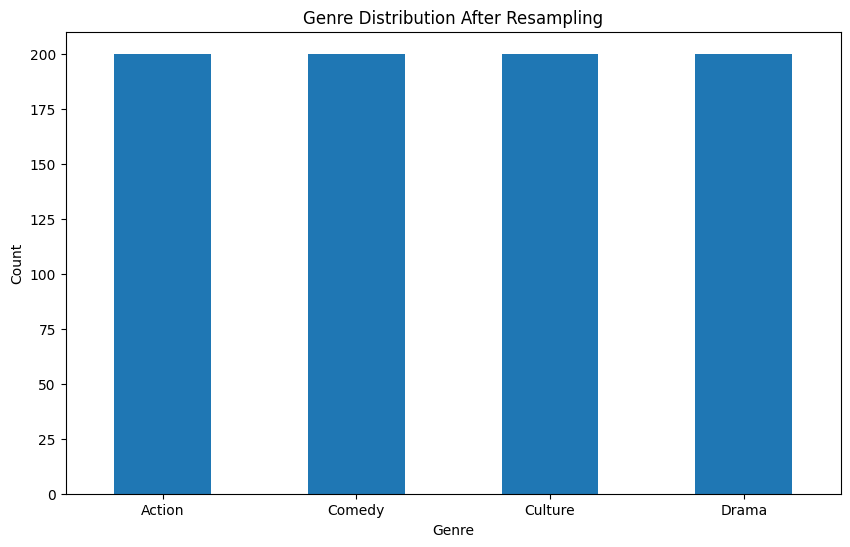

In [23]:
genre_counts_resampled = y_resampled.value_counts()
plt.figure(figsize=(10, 6))
genre_counts_resampled.plot(kind='bar')
plt.title('Genre Distribution After Resampling')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Additionally, encoding categorical variables is an essential step in feature engineering for machine learning models. Depending on the nature of your categorical features, you may need to apply techniques such as one-hot encoding or label encoding to convert them into a format suitable for model training.

In [24]:
# Feel free to change or modify this function, this is a suggestion.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class CategoricalEncoder:
    def __init__(self, df, categorical_cols):
        self.df = df
        self.categorical_cols = categorical_cols

    def label_encode(self, drop_first=False):
        """
        Apply label encoding to categorical variables.

        Args:
            drop_first (bool): If True, drop the first column of one-hot encoded data to avoid multicollinearity.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables encoded.

        TODO:
        1. Instantiate a LabelEncoder object.
        2. Iterate through each categorical column.
        3. Fit and transform the categorical column using the LabelEncoder.
        4. Replace the original categorical column with the encoded values.
        5. Return the encoded DataFrame.
        """
        le = LabelEncoder()
        for col in self.categorical_cols:
            self.df[col] = le.fit_transform(self.df[col])
        return self.df

    def one_hot_encode(self, drop_first=False):
        """
        Apply one-hot encoding to categorical variables.

        Args:
            drop_first (bool): If True, drop the first column of one-hot encoded data to avoid multicollinearity.

        Returns:
            pandas.DataFrame: The DataFrame with categorical variables one-hot encoded.

        TODO:
        1. Instantiate a OneHotEncoder object with the appropriate settings (drop_first=drop_first, handle_unknown='ignore').
        2. Iterate through each categorical column.
        3. Fit and transform the categorical column using the OneHotEncoder.
        4. Concatenate the one-hot encoded columns with the original DataFrame.
        5. Drop the original categorical columns.
        6. Return the one-hot encoded DataFrame.
        """
        drop = 'first' if drop_first else None
        ohe = OneHotEncoder(drop=drop, handle_unknown='ignore')
        encoded_cols = ohe.fit_transform(self.df[self.categorical_cols]).toarray()
        encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(self.categorical_cols))
        self.df = self.df.drop(columns=self.categorical_cols)
        self.df = pd.concat([self.df, encoded_df], axis=1)
        return self.df

categorical_cols = ['New_Genre']
categorical_encoder = CategoricalEncoder(df, categorical_cols)

# TODO: Call the label_encode method to apply label encoding
df_label_encoded = categorical_encoder.label_encode()
# TODO: Call the one_hot_encode method to apply one-hot encoding
df_one_hot_encoded = categorical_encoder.one_hot_encode(drop_first=True)

# Fine-tuning

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [26]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

## Persian

In [27]:
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, BertForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-fa-zwnj-base')
model = AutoModelForSequenceClassification.from_pretrained('HooshvareLab/bert-fa-zwnj-base', num_labels=4)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

### Preprocessed

In [29]:
# Choose train and test data from preprocessed persian data
# tokenize train and test data with max_length 512
train_encodings = tokenizer(list(X_resampled['Preprocessed Persian']), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(X_test['Preprocessed Persian']), truncation=True, padding=True, max_length=512)
train_dataset = CustomDataset(train_encodings, y_resampled_encoded)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

In [30]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=12,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    learning_rate=2e-5,
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    save_total_limit=1
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer.train()

C:\Users\arenf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\training_args.py:1493: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
  0%|          | 0/335 [00:00<?, ?it/s]C:\Users\arenf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
 15%|█▍        | 50/335 [01:50<10:58,  2.31s/it]

{'loss': 1.3983, 'grad_norm': 7.139908313751221, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.75}


                                                
 20%|██        | 67/335 [02:43<13:36,  3.05s/it]

{'eval_loss': 1.3499000072479248, 'eval_runtime': 6.5986, 'eval_samples_per_second': 28.036, 'eval_steps_per_second': 2.425, 'epoch': 1.0}


 30%|██▉       | 100/335 [03:27<03:11,  1.23it/s]

{'loss': 1.3606, 'grad_norm': 5.821175575256348, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.49}


                                                 
 40%|████      | 134/335 [03:58<02:32,  1.32it/s]

{'eval_loss': 1.3387447595596313, 'eval_runtime': 2.6654, 'eval_samples_per_second': 69.409, 'eval_steps_per_second': 6.003, 'epoch': 2.0}


 45%|████▍     | 150/335 [04:13<02:35,  1.19it/s]

{'loss': 1.2746, 'grad_norm': 5.194592475891113, 'learning_rate': 6e-06, 'epoch': 2.24}


 60%|█████▉    | 200/335 [04:57<02:06,  1.07it/s]

{'loss': 1.1277, 'grad_norm': 10.194101333618164, 'learning_rate': 8.000000000000001e-06, 'epoch': 2.99}


                                                 
 60%|██████    | 201/335 [05:01<01:54,  1.17it/s]

{'eval_loss': 1.3653514385223389, 'eval_runtime': 2.8938, 'eval_samples_per_second': 63.93, 'eval_steps_per_second': 5.529, 'epoch': 3.0}


 75%|███████▍  | 250/335 [05:51<01:24,  1.00it/s]

{'loss': 0.8551, 'grad_norm': 11.032187461853027, 'learning_rate': 1e-05, 'epoch': 3.73}


                                                 
 80%|████████  | 268/335 [06:13<01:03,  1.05it/s]

{'eval_loss': 1.2007787227630615, 'eval_runtime': 3.6137, 'eval_samples_per_second': 51.194, 'eval_steps_per_second': 4.428, 'epoch': 4.0}


 90%|████████▉ | 300/335 [06:48<00:35,  1.02s/it]

{'loss': 0.598, 'grad_norm': 8.836167335510254, 'learning_rate': 1.2e-05, 'epoch': 4.48}


                                                 
100%|██████████| 335/335 [07:30<00:00,  1.04it/s]

{'eval_loss': 1.1614998579025269, 'eval_runtime': 3.4412, 'eval_samples_per_second': 53.76, 'eval_steps_per_second': 4.65, 'epoch': 5.0}


100%|██████████| 335/335 [07:33<00:00,  1.35s/it]

{'train_runtime': 453.1222, 'train_samples_per_second': 8.828, 'train_steps_per_second': 0.739, 'train_loss': 1.0347621092155799, 'epoch': 5.0}


TrainOutput(global_step=335, training_loss=1.0347621092155799, metrics={'train_runtime': 453.1222, 'train_samples_per_second': 8.828, 'train_steps_per_second': 0.739, 'total_flos': 912682862208000.0, 'train_loss': 1.0347621092155799, 'epoch': 5.0})

100%|██████████| 16/16 [00:02<00:00,  6.64it/s]


Accuracy: 0.4972972972972973
F1 Score: 0.5029178740806648


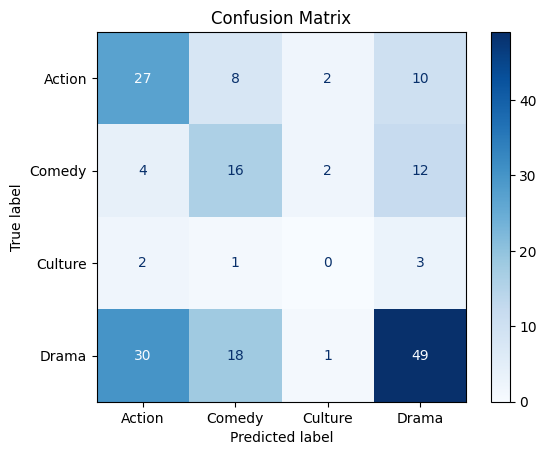

In [31]:
# Calulate the Accuracy and F1-score for test data
# Draw Confusion matrix according to all genres
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

predictions, labels, _ = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions, axis=1)

true_labels = label_encoder.inverse_transform(labels)
pred_labels = label_encoder.inverse_transform(pred_labels)

accuracy = accuracy_score(true_labels, pred_labels)
print(f'Accuracy: {accuracy}')

f1 = f1_score(true_labels, pred_labels, average='weighted')
print(f'F1 Score: {f1}')

conf_matrix = confusion_matrix(true_labels, pred_labels)
genre_labels = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=genre_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Not Preprocessed


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\arenf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\training_args.py:1493: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
 15%|█▍        | 50/335 [00:47<04:40,  1.01it/s]

{'loss': 1.4052, 'grad_norm': 6.72542667388916, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.75}


 20%|██        | 67/335 [01:09<04:00,  1.11it/s]

{'eval_loss': 1.3186665773391724, 'eval_runtime': 4.716, 'eval_samples_per_second': 39.228, 'eval_steps_per_second': 3.393, 'epoch': 1.0}


 30%|██▉       | 100/335 [01:45<04:08,  1.06s/it]

{'loss': 1.3591, 'grad_norm': 5.2448625564575195, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.49}


 40%|████      | 134/335 [02:30<03:40,  1.10s/it]

{'eval_loss': 1.350030541419983, 'eval_runtime': 6.0931, 'eval_samples_per_second': 30.362, 'eval_steps_per_second': 2.626, 'epoch': 2.0}


 45%|████▍     | 150/335 [02:52<03:45,  1.22s/it]

{'loss': 1.2768, 'grad_norm': 5.644573211669922, 'learning_rate': 6e-06, 'epoch': 2.24}


 60%|█████▉    | 200/335 [03:57<03:12,  1.43s/it]

{'loss': 1.1427, 'grad_norm': 6.381427764892578, 'learning_rate': 8.000000000000001e-06, 'epoch': 2.99}


 60%|██████    | 201/335 [04:07<02:52,  1.29s/it]

{'eval_loss': 1.328137755393982, 'eval_runtime': 8.232, 'eval_samples_per_second': 22.473, 'eval_steps_per_second': 1.944, 'epoch': 3.0}


 75%|███████▍  | 250/335 [05:21<02:06,  1.49s/it]

{'loss': 0.9261, 'grad_norm': 8.563855171203613, 'learning_rate': 1e-05, 'epoch': 3.73}


 80%|████████  | 268/335 [05:56<01:29,  1.33s/it]

{'eval_loss': 1.1445327997207642, 'eval_runtime': 8.4883, 'eval_samples_per_second': 21.795, 'eval_steps_per_second': 1.885, 'epoch': 4.0}


 90%|████████▉ | 300/335 [06:47<00:54,  1.57s/it]

{'loss': 0.6168, 'grad_norm': 6.833120346069336, 'learning_rate': 1.2e-05, 'epoch': 4.48}


100%|██████████| 335/335 [07:55<00:00,  1.55s/it]

{'eval_loss': 1.2038050889968872, 'eval_runtime': 7.9665, 'eval_samples_per_second': 23.222, 'eval_steps_per_second': 2.008, 'epoch': 5.0}


100%|██████████| 335/335 [07:58<00:00,  1.55s/it]

{'train_runtime': 478.1542, 'train_samples_per_second': 8.366, 'train_steps_per_second': 0.701, 'train_loss': 1.0486357162247844, 'epoch': 5.0}


100%|██████████| 16/16 [00:06<00:00,  2.39it/s]


Accuracy: 0.4810810810810811
F1 Score: 0.4923049434205621


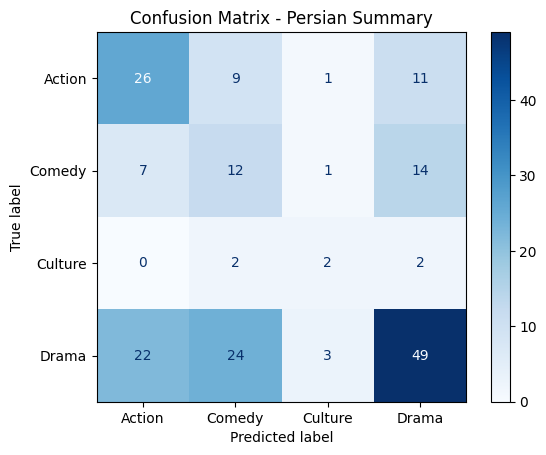

In [104]:
# Repeat all the previous steps for the raw persian data
# Don't forget to load the model again
# Tokenizer and Model
tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-fa-zwnj-base')
model = BertForSequenceClassification.from_pretrained('HooshvareLab/bert-fa-zwnj-base', num_labels=4)

label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

train_encodings_summary = tokenizer(list(X_resampled['Persian summary']), truncation=True, padding=True, max_length=512)
test_encodings_summary = tokenizer(list(X_test['Persian summary']), truncation=True, padding=True, max_length=512)

train_dataset_summary = CustomDataset(train_encodings_summary, y_resampled_encoded)
test_dataset_summary = CustomDataset(test_encodings_summary, y_test_encoded)

training_args_summary = TrainingArguments(
    output_dir='./results_summary',
    num_train_epochs=5,
    per_device_train_batch_size=12,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs_summary',
    learning_rate=2e-5,
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    save_total_limit=1
)

trainer_summary = Trainer(
    model=model,
    args=training_args_summary,
    train_dataset=train_dataset_summary,
    eval_dataset=test_dataset_summary,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer_summary.train()

predictions_summary, labels_summary, _ = trainer_summary.predict(test_dataset_summary)
pred_labels_summary = np.argmax(predictions_summary, axis=1)

true_labels_summary = label_encoder.inverse_transform(labels_summary)
pred_labels_summary = label_encoder.inverse_transform(pred_labels_summary)

accuracy_summary = accuracy_score(true_labels_summary, pred_labels_summary)
print(f'Accuracy: {accuracy_summary}')

f1_summary = f1_score(true_labels_summary, pred_labels_summary, average='weighted')
print(f'F1 Score: {f1_summary}')

conf_matrix_summary = confusion_matrix(true_labels_summary, pred_labels_summary)
genre_labels_summary = label_encoder.classes_
disp_summary = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_summary, display_labels=genre_labels_summary)
disp_summary.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Persian Summary')
plt.show()

## English


### Preprocessed

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\arenf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\training_args.py:1493: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
 15%|█▍        | 50/335 [00:45<04:27,  1.07it/s]

{'loss': 1.4044, 'grad_norm': 5.677258491516113, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.75}


 20%|██        | 67/335 [01:03<03:44,  1.20it/s]

{'eval_loss': 1.4022847414016724, 'eval_runtime': 3.4464, 'eval_samples_per_second': 53.679, 'eval_steps_per_second': 4.642, 'epoch': 1.0}


 30%|██▉       | 100/335 [01:33<03:19,  1.18it/s]

{'loss': 1.3609, 'grad_norm': 6.471789836883545, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.49}


 40%|████      | 134/335 [02:06<02:40,  1.25it/s]

{'eval_loss': 1.4004257917404175, 'eval_runtime': 3.5413, 'eval_samples_per_second': 52.24, 'eval_steps_per_second': 4.518, 'epoch': 2.0}


 45%|████▍     | 150/335 [02:21<02:35,  1.19it/s]

{'loss': 1.3018, 'grad_norm': 7.075188636779785, 'learning_rate': 6e-06, 'epoch': 2.24}


 60%|█████▉    | 200/335 [03:06<02:03,  1.10it/s]

{'loss': 1.1805, 'grad_norm': 10.948087692260742, 'learning_rate': 8.000000000000001e-06, 'epoch': 2.99}


 60%|██████    | 201/335 [03:11<01:51,  1.20it/s]

{'eval_loss': 1.3153760433197021, 'eval_runtime': 3.8426, 'eval_samples_per_second': 48.144, 'eval_steps_per_second': 4.164, 'epoch': 3.0}


 75%|███████▍  | 250/335 [04:02<01:26,  1.01s/it]

{'loss': 1.0155, 'grad_norm': 14.571495056152344, 'learning_rate': 1e-05, 'epoch': 3.73}


 80%|████████  | 268/335 [04:25<01:07,  1.01s/it]

{'eval_loss': 1.1854439973831177, 'eval_runtime': 3.9596, 'eval_samples_per_second': 46.722, 'eval_steps_per_second': 4.041, 'epoch': 4.0}


 90%|████████▉ | 300/335 [04:59<00:34,  1.01it/s]

{'loss': 0.831, 'grad_norm': 10.223592758178711, 'learning_rate': 1.2e-05, 'epoch': 4.48}


100%|██████████| 335/335 [05:40<00:00,  1.13it/s]

{'eval_loss': 1.114627718925476, 'eval_runtime': 3.8311, 'eval_samples_per_second': 48.289, 'eval_steps_per_second': 4.176, 'epoch': 5.0}


100%|██████████| 335/335 [05:42<00:00,  1.02s/it]


{'train_runtime': 342.7501, 'train_samples_per_second': 11.67, 'train_steps_per_second': 0.977, 'train_loss': 1.1321388529307808, 'epoch': 5.0}


100%|██████████| 16/16 [00:03<00:00,  4.64it/s]


Accuracy: 0.4540540540540541
F1 Score: 0.46444354577307173


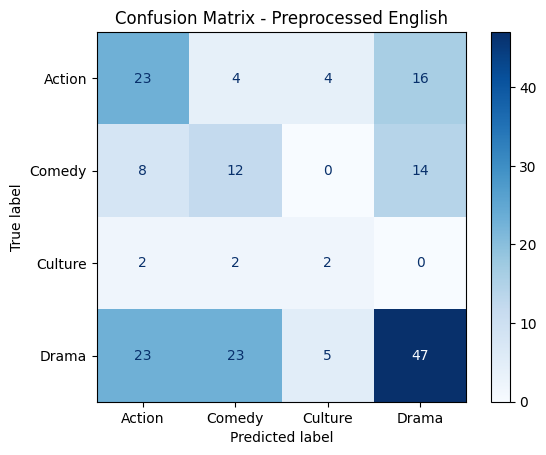

In [110]:
# load  pre-trained BERT model and its tokenizer
# Load pre-trained BERT model and tokenizer for English
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

train_encodings_english = tokenizer(list(X_resampled['Preprocessed English']), truncation=True, padding=True, max_length=512)
test_encodings_english = tokenizer(list(X_test['Preprocessed English']), truncation=True, padding=True, max_length=512)

train_dataset_english = CustomDataset(train_encodings_english, y_resampled_encoded)
test_dataset_english = CustomDataset(test_encodings_english, y_test_encoded)

training_args_english = TrainingArguments(
    output_dir='./results_english',
    num_train_epochs=5,
    per_device_train_batch_size=12,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs_english',
    learning_rate=2e-5,
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    save_total_limit=1
)
trainer_english = Trainer(
    model=model,
    args=training_args_english,
    train_dataset=train_dataset_english,
    eval_dataset=test_dataset_english,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer_english.train()

predictions_english, labels_english, _ = trainer_english.predict(test_dataset_english)
pred_labels_english = np.argmax(predictions_english, axis=1)

true_labels_english = label_encoder.inverse_transform(labels_english)
pred_labels_english = label_encoder.inverse_transform(pred_labels_english)

accuracy_english = accuracy_score(true_labels_english, pred_labels_english)
print(f'Accuracy: {accuracy_english}')

f1_english = f1_score(true_labels_english, pred_labels_english, average='weighted')
print(f'F1 Score: {f1_english}')

# Confusion matrix
conf_matrix_english = confusion_matrix(true_labels_english, pred_labels_english)
genre_labels_english = label_encoder.classes_
disp_english = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_english, display_labels=genre_labels_english)
disp_english.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix - Preprocessed English')
plt.show()

### Not Preprocessed


In [ ]:
from transformers import BertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

train_encodings_english_raw = tokenizer(list(X_resampled['English summary']), truncation=True, padding=True, max_length=512)
test_encodings_english_raw = tokenizer(list(X_test['English summary']), truncation=True, padding=True, max_length=512)

train_dataset_english_raw = CustomDataset(train_encodings_english_raw, y_resampled_encoded)
test_dataset_english_raw = CustomDataset(test_encodings_english_raw, y_test_encoded)

training_args_english_raw = TrainingArguments(
    output_dir='./results_english_raw',
    num_train_epochs=5,
    per_device_train_batch_size=12,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs_english_raw',
    learning_rate=2e-5,
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    save_total_limit=1
)

trainer_english_raw = Trainer(
    model=model,
    args=training_args_english_raw,
    train_dataset=train_dataset_english_raw,
    eval_dataset=test_dataset_english_raw,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer_english_raw.train()

100%|██████████| 16/16 [00:04<00:00,  3.77it/s]


Accuracy: 0.4486486486486487
F1 Score: 0.44103671018536933


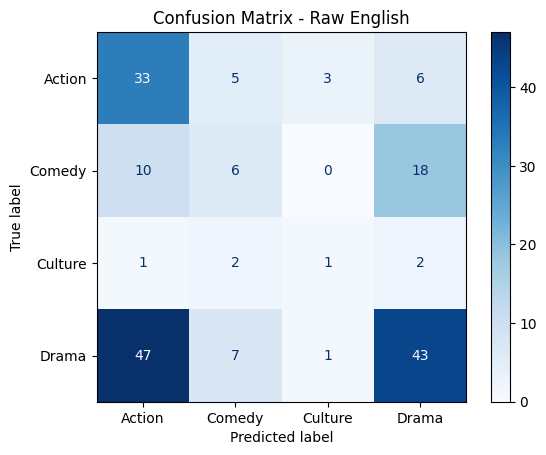

In [30]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
predictions_english_raw, labels_english_raw, _ = trainer_english_raw.predict(test_dataset_english_raw)
pred_labels_english_raw = np.argmax(predictions_english_raw, axis=1)

true_labels_english_raw = label_encoder.inverse_transform(labels_english_raw)
pred_labels_english_raw = label_encoder.inverse_transform(pred_labels_english_raw)

accuracy_english_raw = accuracy_score(true_labels_english_raw, pred_labels_english_raw)
print(f'Accuracy: {accuracy_english_raw}')

f1_english_raw = f1_score(true_labels_english_raw, pred_labels_english_raw, average='weighted')
print(f'F1 Score: {f1_english_raw}')

conf_matrix_english_raw = confusion_matrix(true_labels_english_raw, pred_labels_english_raw)
genre_labels_english_raw = label_encoder.classes_
disp_english_raw = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_english_raw, display_labels=genre_labels_english_raw)
disp_english_raw.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Raw English')
plt.show()

## Results Analysis

Analyze the results of the Fine-tuning section.

*Answer*:
## Conclusion on Resampling and Model Performance

Despite our efforts to balance the training dataset using resampling techniques, the results indicate that the accuracy and F1 score on the test data remain around 0.5. This suggests that the resampling method employed was rather naive or simplistic. Specifically, duplicating minority class samples to match the majority class may have inadvertently led to overfitting.

### Key Points:
- **Simple Duplicating**: By merely duplicating minority class samples, we may have introduced redundancy in the training data. This can cause the model to memorize specific instances rather than learning general patterns.
- **Overfitting**: Overfitting occurs when a model learns the training data too well, including its noise and outliers, and fails to generalize to unseen data. The resampling method used likely exacerbated this issue, as evidenced by the lack of improvement in test accuracy.
- **Model Performance**: The persistent 0.5 accuracy indicates that the model struggles to correctly predict the test samples' classes, highlighting the limitations of the current resampling strategy.

### Further Steps:
To address these issues, I decided to try SMOTE (Synthetic Minority Over-sampling Technique) resampling on the English preprocessed data. This approach yielded better results(Accuracy: 0.6162162162162163 and F1 Score: 0.5923256089422163), suggesting that SMOTE's ability to generate synthetic samples rather than simply duplicating existing ones can improve model performance and reduce overfitting. However, due to the **long time required for training and limited resources and time**, I was only able to run this on the English preprocessed data but i believe that this approach would also yield better results on the other training datasets too.

### SMOTE

In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback, BertForSequenceClassification
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=4)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tokenize the data
def tokenize_data(texts):
    return tokenizer(texts, truncation=True, padding=True, max_length=512)

train_encodings = tokenize_data(list(X_train['Preprocessed English']))
test_encodings = tokenize_data(list(X_test['Preprocessed English']))

In [26]:
# Convert tokenized inputs to numpy arrays for SMOTE
X_train_smote = np.array(train_encodings['input_ids'])
y_train_smote = np.array(y_train_encoded)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train_smote, y_train_smote)

# Create attention masks for the resampled data
attention_masks_smote = np.array(train_encodings['attention_mask'])
attention_masks_smote = np.array([attention_masks_smote[idx % len(attention_masks_smote)] for idx in range(len(X_smote))])

# Verify lengths of resampled data
print(f"Length of resampled input_ids: {len(X_smote)}")
print(f"Length of resampled attention_mask: {len(attention_masks_smote)}")
print(f"Length of resampled labels: {len(y_smote)}")

# Update train_encodings with resampled data
train_encodings = {'input_ids': torch.tensor(X_smote), 'attention_mask': torch.tensor(attention_masks_smote)}

Length of resampled input_ids: 1768
Length of resampled attention_mask: 1768
Length of resampled labels: 1768


In [27]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_smote)
test_dataset = CustomDataset(test_encodings, y_test_encoded)

In [28]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=12,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    learning_rate=2e-5,
    logging_steps=50,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    save_total_limit=1
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

trainer.train()

C:\Users\arenf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\training_args.py:1493: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
  0%|          | 0/740 [00:00<?, ?it/s]C:\Users\arenf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
  7%|▋         | 50/740 [00:40<09:25,  1.22it/s]

{'loss': 1.3875, 'grad_norm': 7.095351696014404, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.34}


 14%|█▎        | 100/740 [01:27<11:01,  1.03s/it]

{'loss': 1.227, 'grad_norm': 6.533061504364014, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.68}


                                                 
 20%|██        | 148/740 [02:22<08:28,  1.16it/s]

{'eval_loss': 1.1489578485488892, 'eval_runtime': 5.9292, 'eval_samples_per_second': 31.201, 'eval_steps_per_second': 2.698, 'epoch': 1.0}


 20%|██        | 150/740 [02:26<26:10,  2.66s/it]

{'loss': 1.1527, 'grad_norm': 6.250003337860107, 'learning_rate': 6e-06, 'epoch': 1.01}


 27%|██▋       | 200/740 [03:24<10:54,  1.21s/it]

{'loss': 1.0934, 'grad_norm': 4.501687049865723, 'learning_rate': 8.000000000000001e-06, 'epoch': 1.35}


 34%|███▍      | 250/740 [04:25<10:00,  1.23s/it]

{'loss': 1.0983, 'grad_norm': 8.799269676208496, 'learning_rate': 1e-05, 'epoch': 1.69}


                                                 
 40%|████      | 296/740 [05:27<07:41,  1.04s/it]

{'eval_loss': 1.1794700622558594, 'eval_runtime': 6.5847, 'eval_samples_per_second': 28.095, 'eval_steps_per_second': 2.43, 'epoch': 2.0}


 41%|████      | 300/740 [05:34<14:51,  2.03s/it]

{'loss': 1.0955, 'grad_norm': 6.168920516967773, 'learning_rate': 1.2e-05, 'epoch': 2.03}


 47%|████▋     | 350/740 [06:32<07:50,  1.21s/it]

{'loss': 1.0282, 'grad_norm': 6.067987442016602, 'learning_rate': 1.4e-05, 'epoch': 2.36}


 54%|█████▍    | 400/740 [07:32<06:45,  1.19s/it]

{'loss': 1.0832, 'grad_norm': 6.6955976486206055, 'learning_rate': 1.6000000000000003e-05, 'epoch': 2.7}


                                                 
 60%|██████    | 444/740 [08:27<04:33,  1.08it/s]

{'eval_loss': 1.0132665634155273, 'eval_runtime': 5.6453, 'eval_samples_per_second': 32.77, 'eval_steps_per_second': 2.834, 'epoch': 3.0}


 61%|██████    | 450/740 [08:36<06:58,  1.44s/it]

{'loss': 1.0095, 'grad_norm': 11.577301025390625, 'learning_rate': 1.8e-05, 'epoch': 3.04}


 68%|██████▊   | 500/740 [09:31<04:16,  1.07s/it]

{'loss': 0.9748, 'grad_norm': 8.208392143249512, 'learning_rate': 2e-05, 'epoch': 3.38}


 74%|███████▍  | 550/740 [10:24<03:16,  1.04s/it]

{'loss': 0.9749, 'grad_norm': 8.90038776397705, 'learning_rate': 1.5833333333333333e-05, 'epoch': 3.72}


                                                 
 80%|████████  | 592/740 [11:15<02:11,  1.12it/s]

{'eval_loss': 1.0126566886901855, 'eval_runtime': 5.2993, 'eval_samples_per_second': 34.91, 'eval_steps_per_second': 3.019, 'epoch': 4.0}


 81%|████████  | 600/740 [11:25<02:49,  1.21s/it]

{'loss': 0.9182, 'grad_norm': 16.907577514648438, 'learning_rate': 1.1666666666666668e-05, 'epoch': 4.05}


 88%|████████▊ | 650/740 [12:17<01:33,  1.03s/it]

{'loss': 0.8082, 'grad_norm': 4.1543498039245605, 'learning_rate': 7.500000000000001e-06, 'epoch': 4.39}


 95%|█████████▍| 700/740 [13:09<00:43,  1.09s/it]

{'loss': 0.782, 'grad_norm': 11.495627403259277, 'learning_rate': 3.3333333333333333e-06, 'epoch': 4.73}


                                                 
100%|██████████| 740/740 [13:58<00:00,  1.17it/s]

{'eval_loss': 1.0015149116516113, 'eval_runtime': 4.6303, 'eval_samples_per_second': 39.954, 'eval_steps_per_second': 3.456, 'epoch': 5.0}


100%|██████████| 740/740 [14:01<00:00,  1.14s/it]

{'train_runtime': 841.1315, 'train_samples_per_second': 10.51, 'train_steps_per_second': 0.88, 'train_loss': 1.0311794590305638, 'epoch': 5.0}


TrainOutput(global_step=740, training_loss=1.0311794590305638, metrics={'train_runtime': 841.1315, 'train_samples_per_second': 10.51, 'train_steps_per_second': 0.88, 'total_flos': 1971600541572480.0, 'train_loss': 1.0311794590305638, 'epoch': 5.0})

100%|██████████| 16/16 [00:03<00:00,  5.09it/s]


Accuracy: 0.6162162162162163
F1 Score: 0.5923256089422163


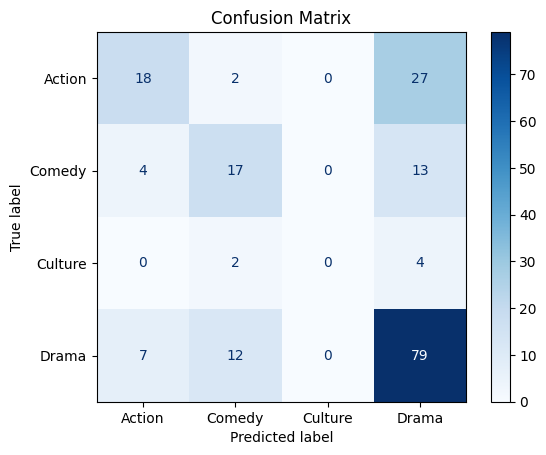

In [29]:
# Evaluation
predictions, labels, _ = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions, axis=1)

# Decode labels back to original class names
true_labels = label_encoder.inverse_transform(labels)
pred_labels = label_encoder.inverse_transform(pred_labels)

# Calculate accuracy and F1 score
accuracy = accuracy_score(true_labels, pred_labels)
print(f'Accuracy: {accuracy}')

f1 = f1_score(true_labels, pred_labels, average='weighted')
print(f'F1 Score: {f1}')

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
genre_labels = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=genre_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()